# Neurips, s1d1, raw proteins

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad
import scvi
import scanpy as sc
import umap

from ridgeplot import ridgeplot

import warnings

warnings.filterwarnings('ignore')

Global seed set to 0
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


In [2]:
#raw protein data, all datasets

adata = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/healthy_malig_!m.h5ad')


In [3]:
adata_neurips=adata[adata.obs['SAMPLE_SET'] == 'N' ]

adata_neurips

View of AnnData object with n_obs × n_vars = 80998 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [4]:
adata_neurips.obs['POOL'].unique().tolist()

['s4d1',
 's3d6',
 's1d2',
 's2d1',
 's3d7',
 's2d4',
 's1d1',
 's4d9',
 's4d8',
 's2d5',
 's3d1',
 's1d3']

In [5]:
adata_neurips.obs['cell_type'].unique().tolist()

['NK',
 'CD8+ T CD69+ CD45RA+',
 'NK CD158e1+',
 'HSC',
 'CD14+ Mono',
 'B1 B IGKC+',
 'CD4+ T activated',
 'CD8+ T CD69+ CD45RO+',
 'G/M prog',
 'Naive CD20+ B IGKC-',
 'CD8+ T CD49f+',
 'Naive CD20+ B IGKC+',
 'CD4+ T naive',
 'CD8+ T naive',
 'CD4+ T activated integrinB7+',
 'cDC2',
 'gdT TCRVD2+',
 'CD8+ T TIGIT+ CD45RO+',
 'CD16+ Mono',
 'Erythroblast',
 'MAIT',
 'T reg',
 'gdT CD158b+',
 'Transitional B',
 'Proerythroblast',
 'CD8+ T CD57+ CD45RO+',
 'Plasmablast IGKC+',
 'ILC1',
 'Lymph prog',
 'ILC',
 'MK/E prog',
 'Normoblast',
 'CD8+ T CD57+ CD45RA+',
 'pDC',
 'B1 B IGKC-',
 'Plasma cell IGKC-',
 'Plasmablast IGKC-',
 'Plasma cell IGKC+',
 'CD8+ T TIGIT+ CD45RA+',
 'CD8+ T naive CD127+ CD26- CD101-',
 'CD4+ T CD314+ CD45RA+',
 'cDC1',
 'T prog cycling',
 'dnT']

In [6]:
#select sample from Neurips dataset

adata_sample=adata_neurips[adata_neurips.obs['POOL'] == 's1d1']

In [7]:
adata_sample.copy()

AnnData object with n_obs × n_vars = 4123 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [8]:
adata_sample.obs['cell_type'].unique().tolist()

['CD14+ Mono',
 'Naive CD20+ B IGKC+',
 'HSC',
 'NK CD158e1+',
 'CD4+ T naive',
 'NK',
 'B1 B IGKC-',
 'Naive CD20+ B IGKC-',
 'pDC',
 'CD4+ T activated',
 'B1 B IGKC+',
 'CD4+ T activated integrinB7+',
 'Transitional B',
 'MAIT',
 'CD8+ T naive',
 'T reg',
 'CD8+ T CD49f+',
 'CD8+ T TIGIT+ CD45RO+',
 'Erythroblast',
 'gdT TCRVD2+',
 'CD8+ T CD57+ CD45RA+',
 'Lymph prog',
 'Plasmablast IGKC+',
 'CD8+ T CD69+ CD45RO+',
 'CD8+ T TIGIT+ CD45RA+',
 'CD8+ T CD69+ CD45RA+',
 'ILC1',
 'cDC2',
 'CD16+ Mono',
 'Proerythroblast',
 'G/M prog',
 'Plasmablast IGKC-',
 'Plasma cell IGKC+',
 'MK/E prog',
 'Plasma cell IGKC-']

In [9]:
adata_sample.obs['POOL'].unique().tolist()

['s1d1']

In [10]:
#Select only NK-cells (based on new_cell_type annotations)

adata_nk=adata_sample[adata_sample.obs['new_cell_type'] == 'NK' ]

In [11]:
adata_nk.copy()

AnnData object with n_obs × n_vars = 202 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [12]:
#Two types of NK cells annotated by Seurat

adata_nk.obs['cell_type']

GACCAATCAATTTCGG-1-s1d1    NK CD158e1+
TCATTGTCACCAGCGT-1-s1d1             NK
ACCATTTCACTCACTC-1-s1d1             NK
GATGCTAGTCAGCTTA-1-s1d1    NK CD158e1+
TGGATCAAGGTTAAAC-1-s1d1    NK CD158e1+
                              ...     
CGGAACCTCGCTGCGA-1-s1d1             NK
TGATGGTAGTGGACGT-1-s1d1             NK
TCTTCCTTCACCGACG-1-s1d1             NK
TCATATCTCCCGGTAG-1-s1d1    NK CD158e1+
AAGAACAGTCTGTTAG-1-s1d1    NK CD158e1+
Name: cell_type, Length: 202, dtype: category
Categories (2, object): ['NK', 'NK CD158e1+']

In [13]:
#surface protein expression of NK-cells
nk_prot=adata_nk.obsm['protein_expression']

In [14]:
#surface protein expression whole sample
prot=adata_sample.obsm['protein_expression']

In [15]:
#NK cells in sample
nk_prot.shape

(202, 141)

In [16]:
#All cells in sample

prot.shape

(4123, 141)

In [17]:
#sorting by mean, all cell types

index_sort = prot.mean().sort_values().index
df_sorted_all = prot[index_sort]

In [18]:
#sorting by mean, NK cells

index_sort = nk_prot.mean().sort_values().index
df_sorted_nk = nk_prot[index_sort]

In total: 4123  cells in the sample


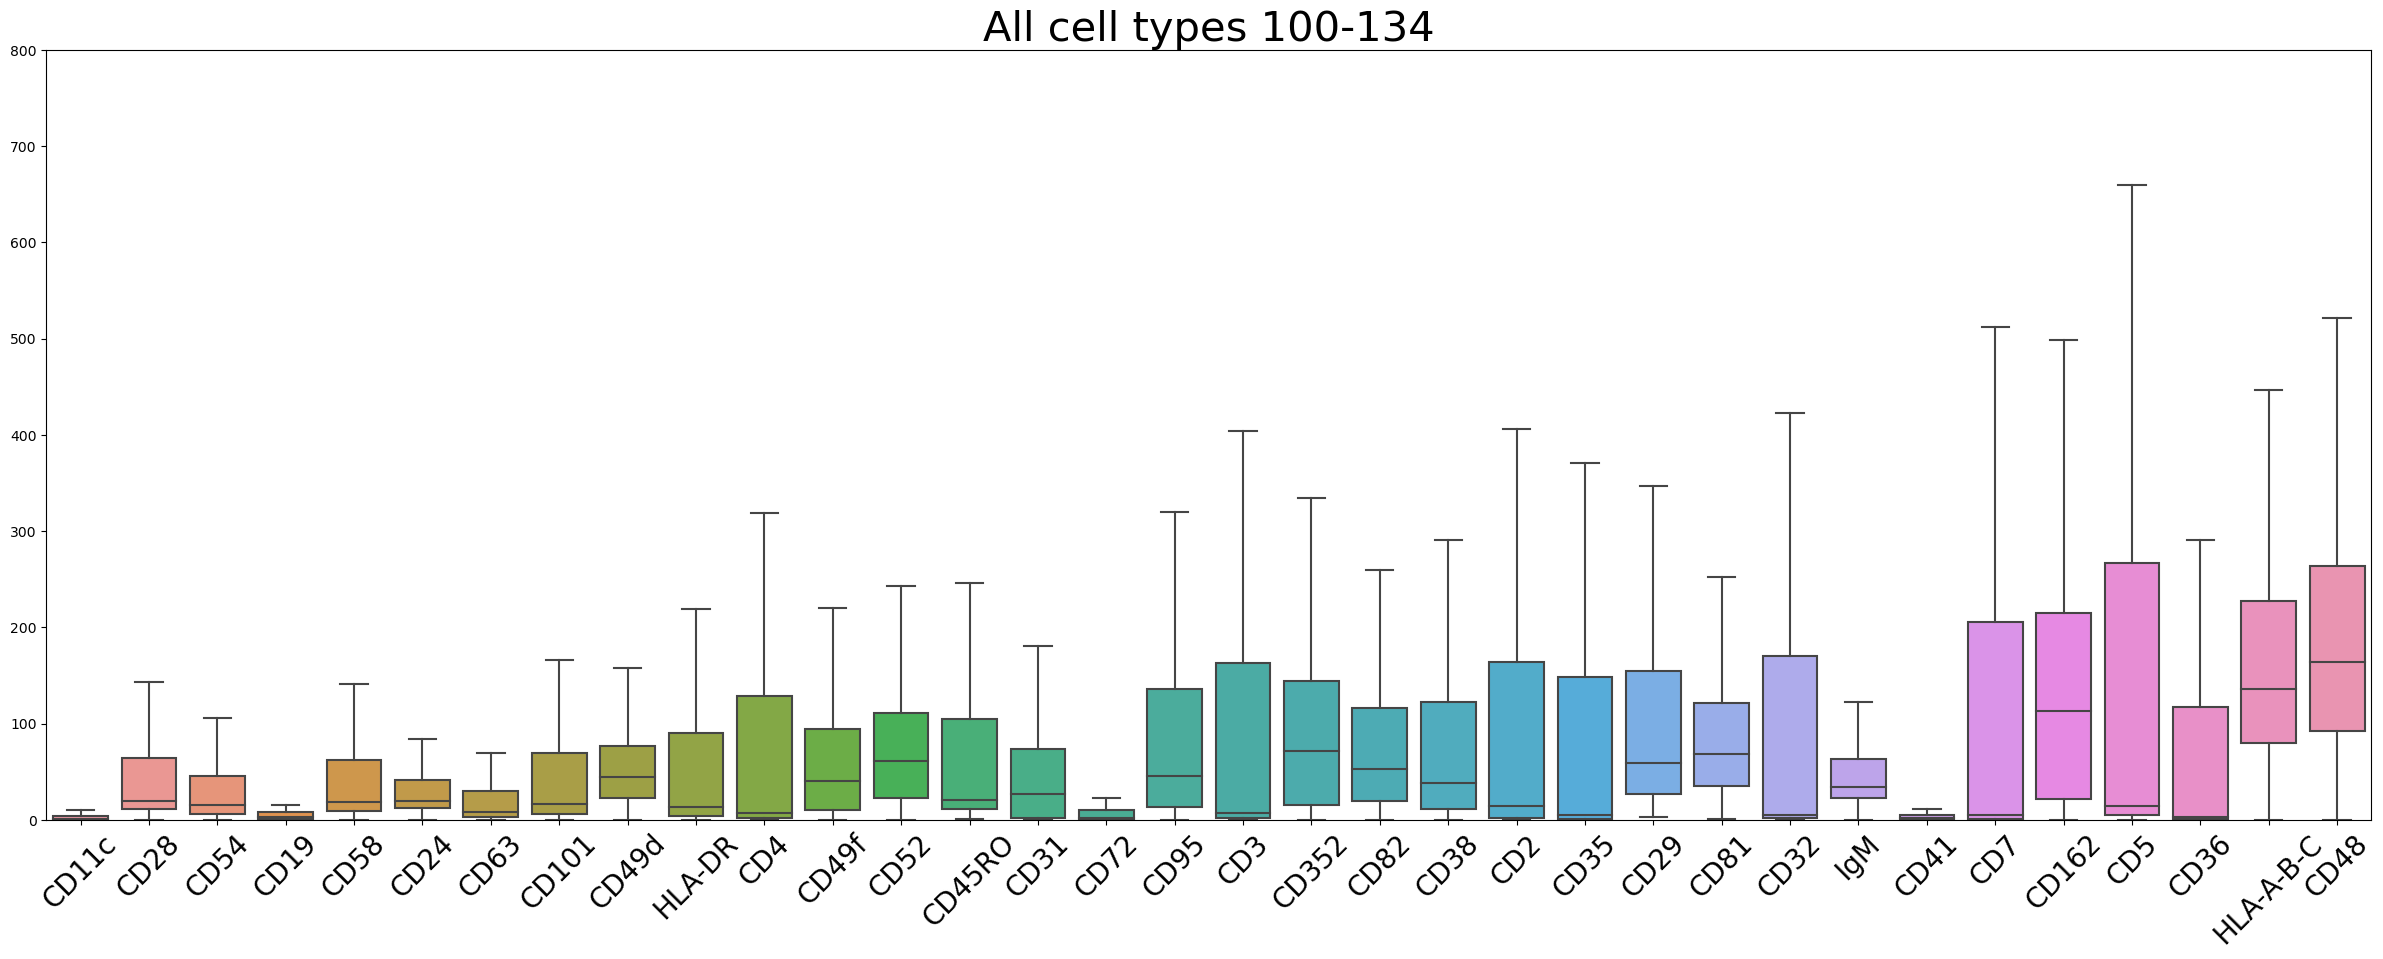

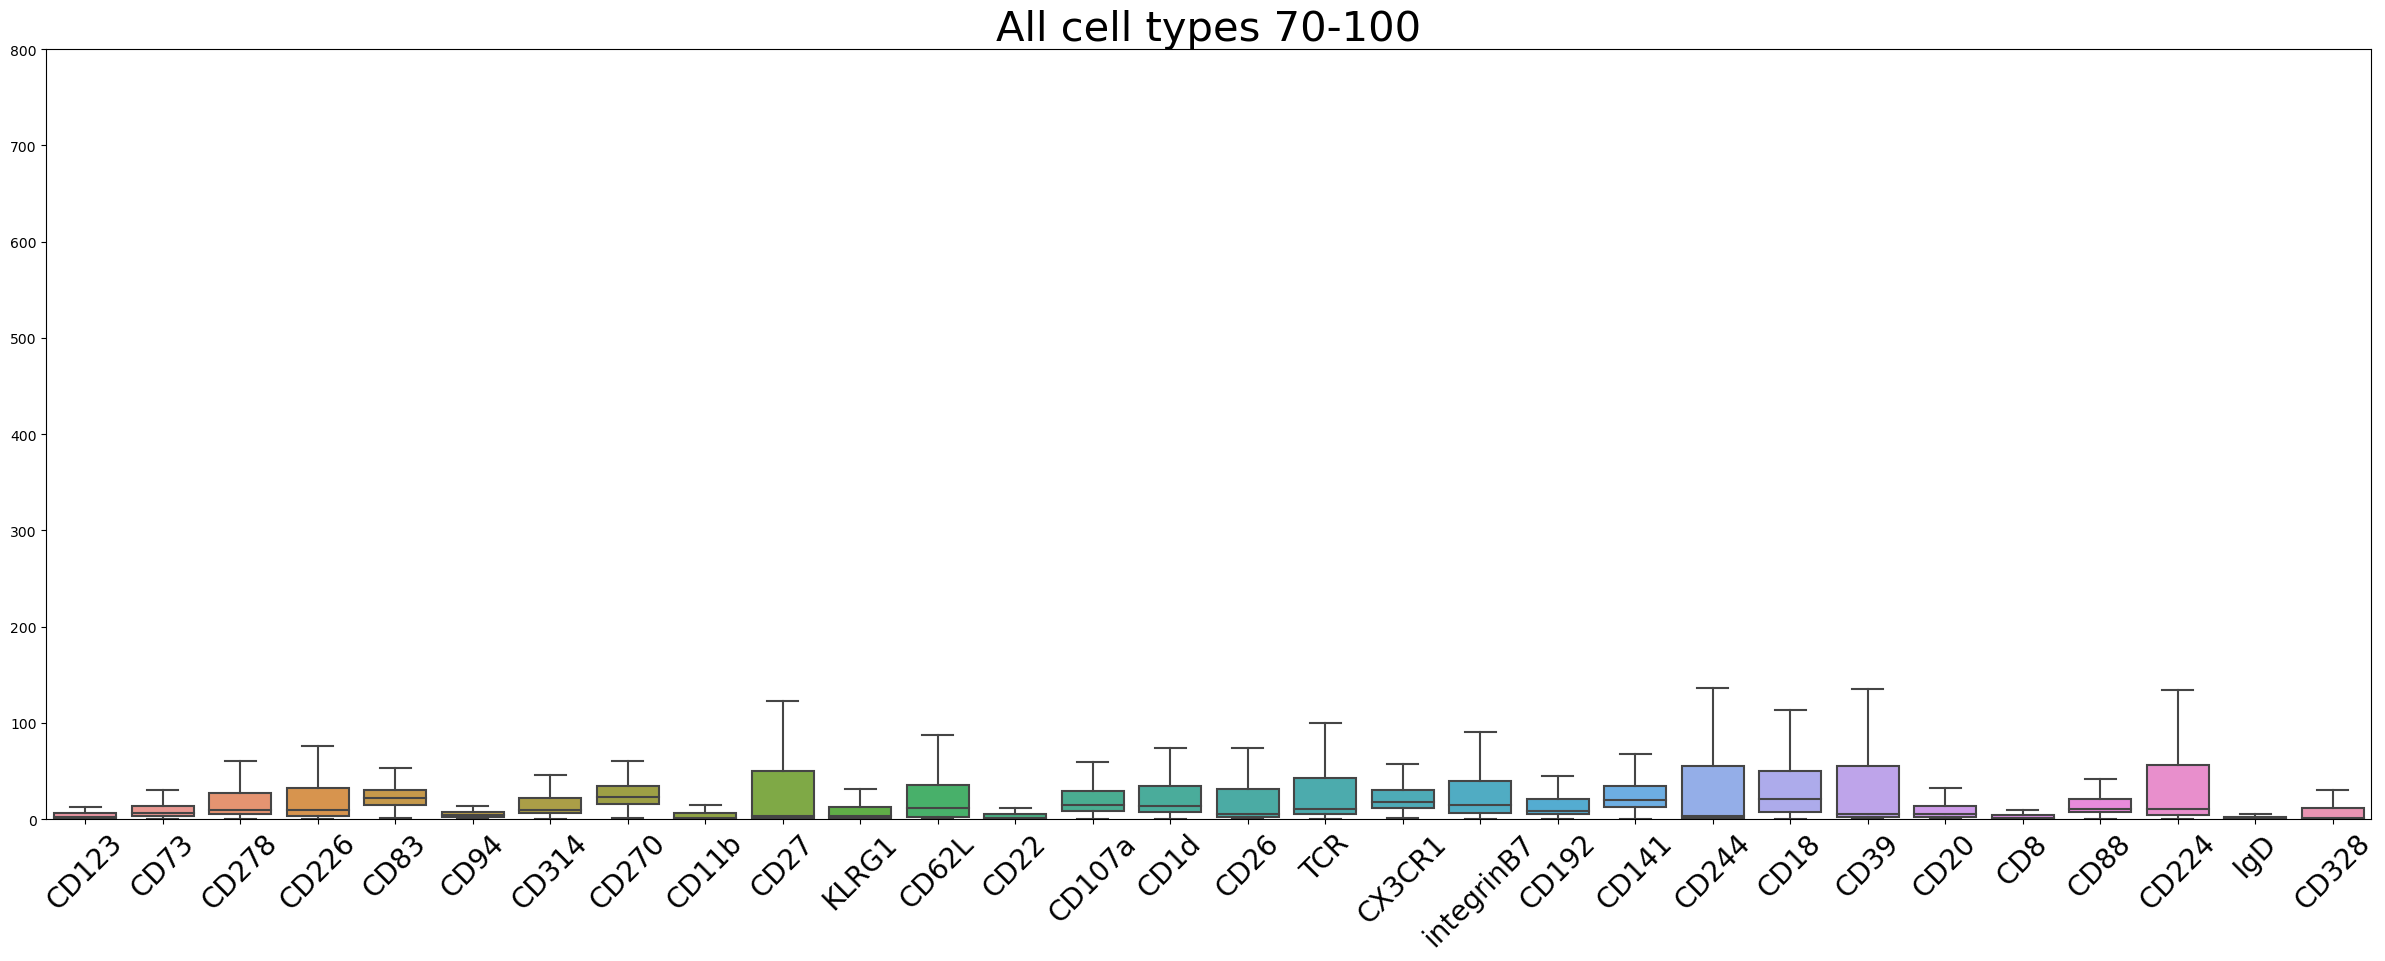

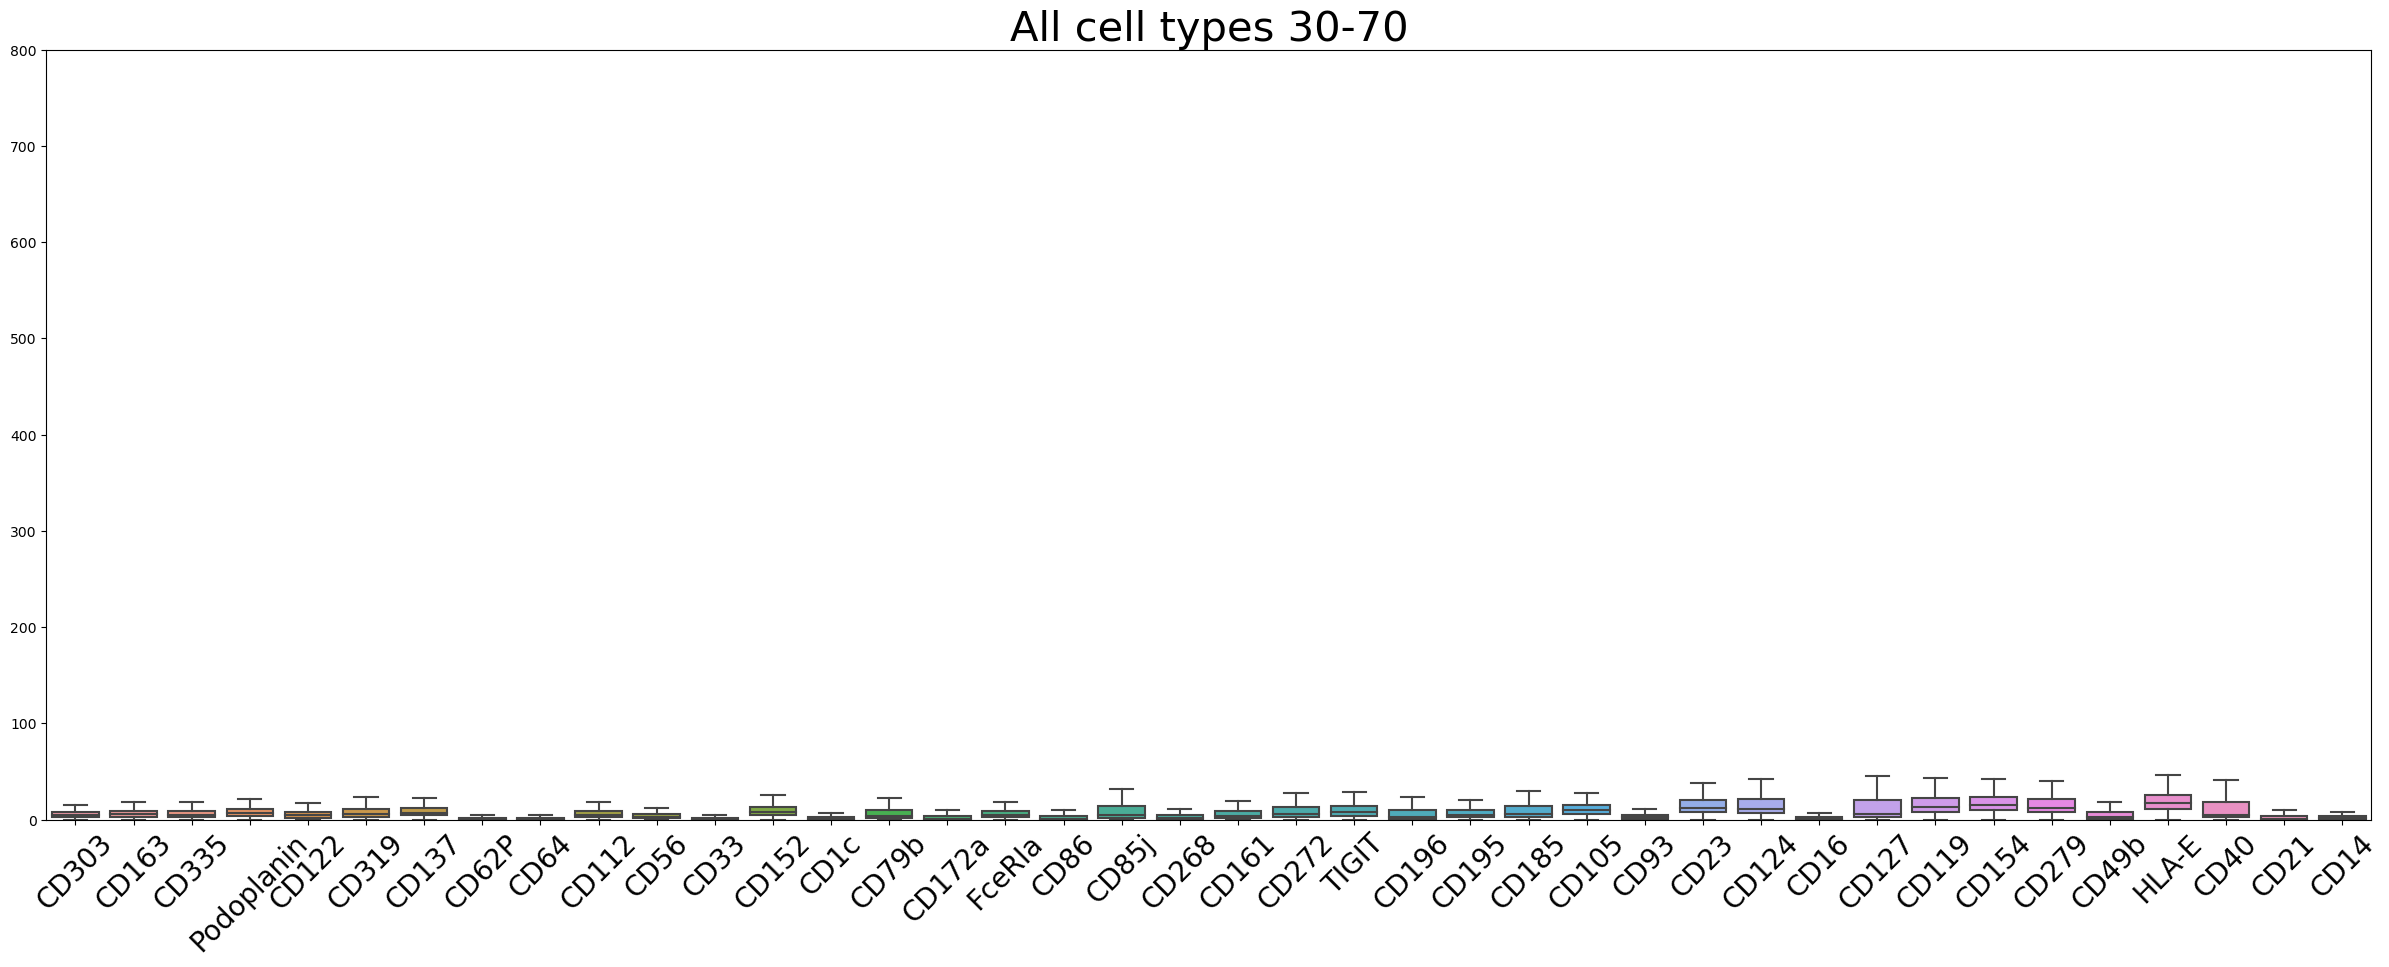

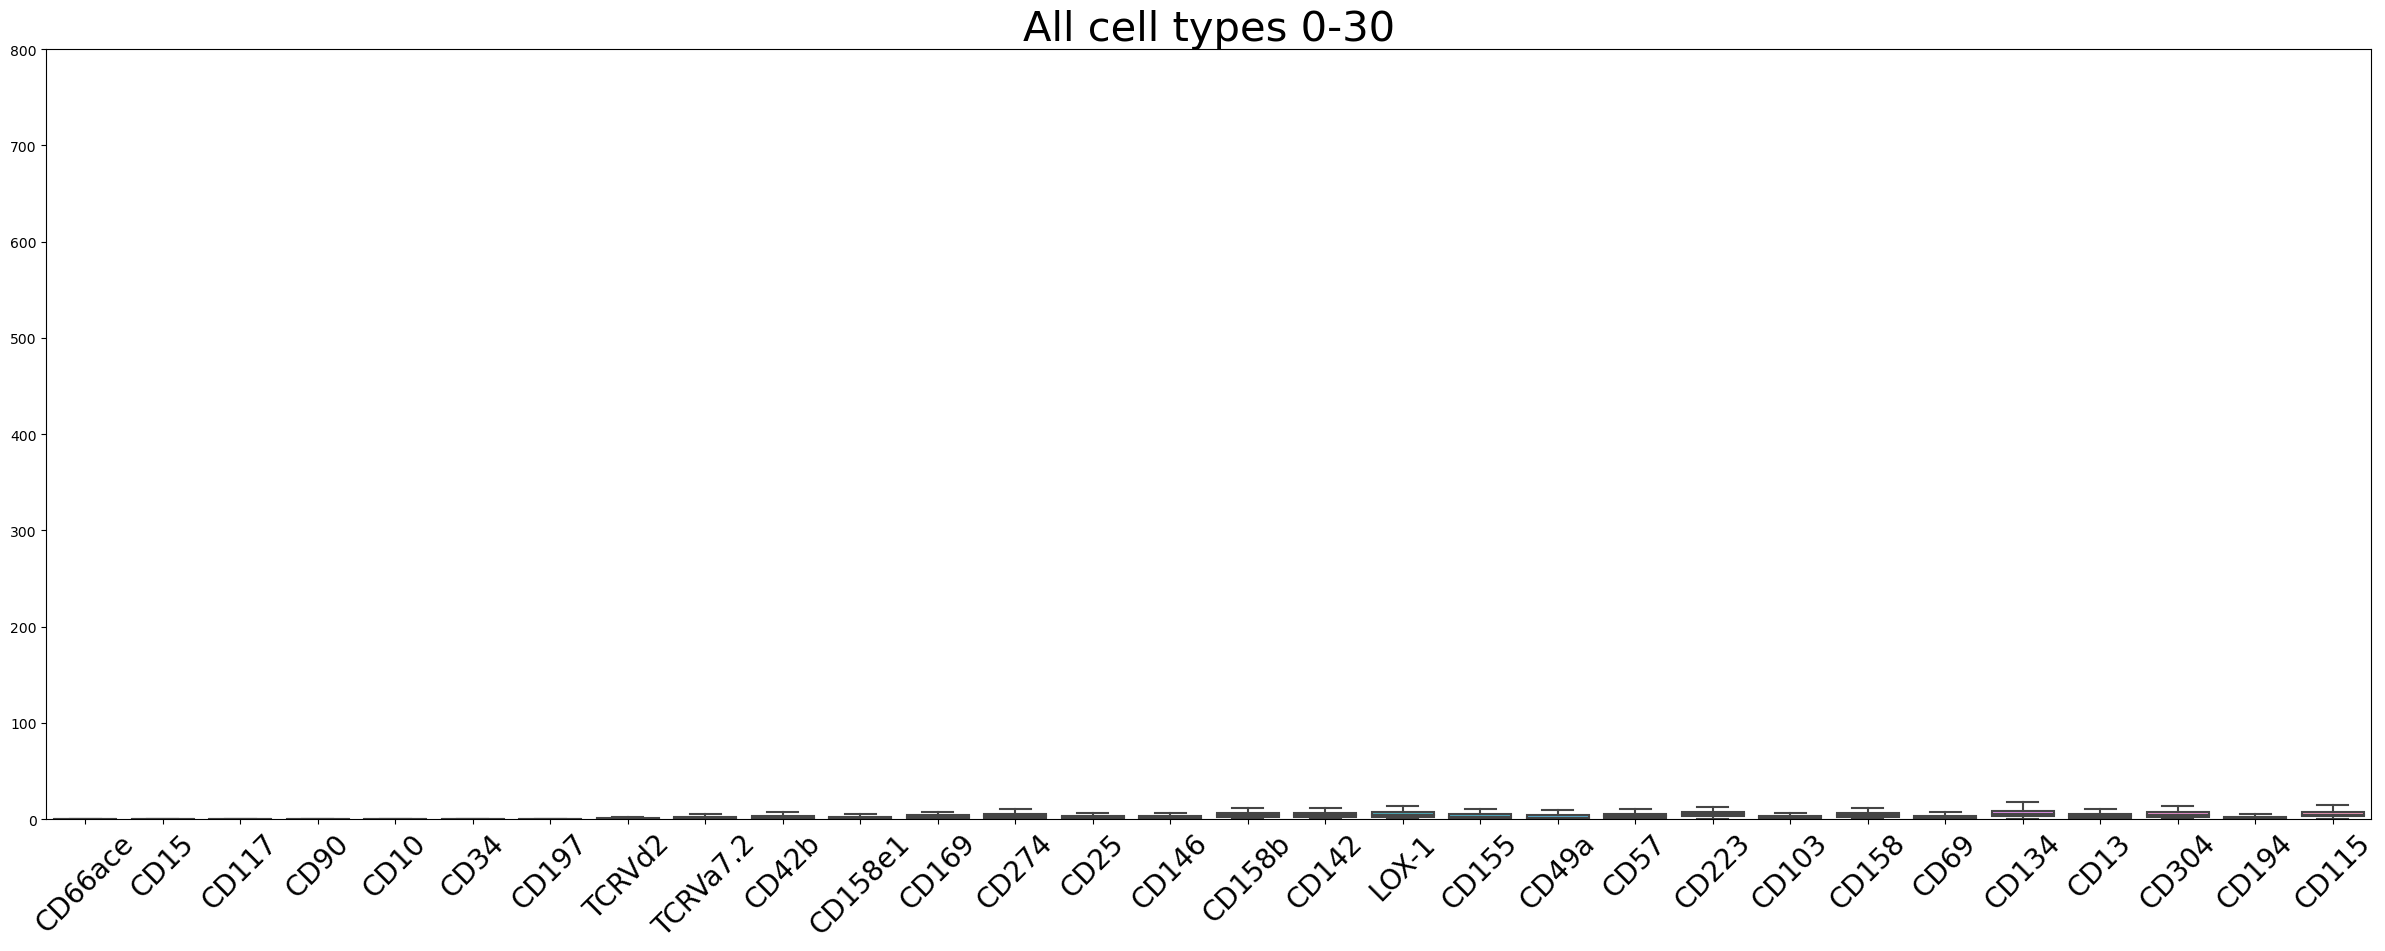

In [19]:
#All cell types

cells= len(prot)

print("In total:", cells, " cells in the sample" )

#From 100 to 134
plt.figure(figsize=(30,10))
plt.ylim(0, 800)
a=sns.boxplot(data=df_sorted_all.iloc[0:26775,100:134],  fliersize=0)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)
plt.title("All cell types 100-134", fontsize=30)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)

#From 70 to 100

plt.figure(figsize=(30,10))
plt.ylim(0, 800)
b=sns.boxplot(data=df_sorted_all.iloc[0:26775,70:100],  fliersize=0)

b.set_xticklabels(b.get_xticklabels(),rotation=45) 
b.tick_params(axis='x', labelsize=20)
plt.title("All cell types 70-100", fontsize=30)

b.set_xticklabels(b.get_xticklabels(),rotation=45) 
b.tick_params(axis='x', labelsize=20)

#From 30 to 70
plt.figure(figsize=(30,10))
plt.ylim(0, 800)
c=sns.boxplot(data=df_sorted_all.iloc[0:26775,30:70],  fliersize=0)

c.set_xticklabels(c.get_xticklabels(),rotation=45) 
c.tick_params(axis='x', labelsize=20)
plt.title("All cell types 30-70", fontsize=30)

c.set_xticklabels(c.get_xticklabels(),rotation=45) 
c.tick_params(axis='x', labelsize=20)

#From 0 to 30
plt.figure(figsize=(30,10))
plt.ylim(0, 800)
d=sns.boxplot(data=df_sorted_all.iloc[0:26775,0:30],  fliersize=0)

d.set_xticklabels(d.get_xticklabels(),rotation=45) 
d.tick_params(axis='x', labelsize=20)
plt.title("All cell types 0-30", fontsize=30)

d.set_xticklabels(d.get_xticklabels(),rotation=45) 
d.tick_params(axis='x', labelsize=20)



In total: 202 NK-cells in the sample


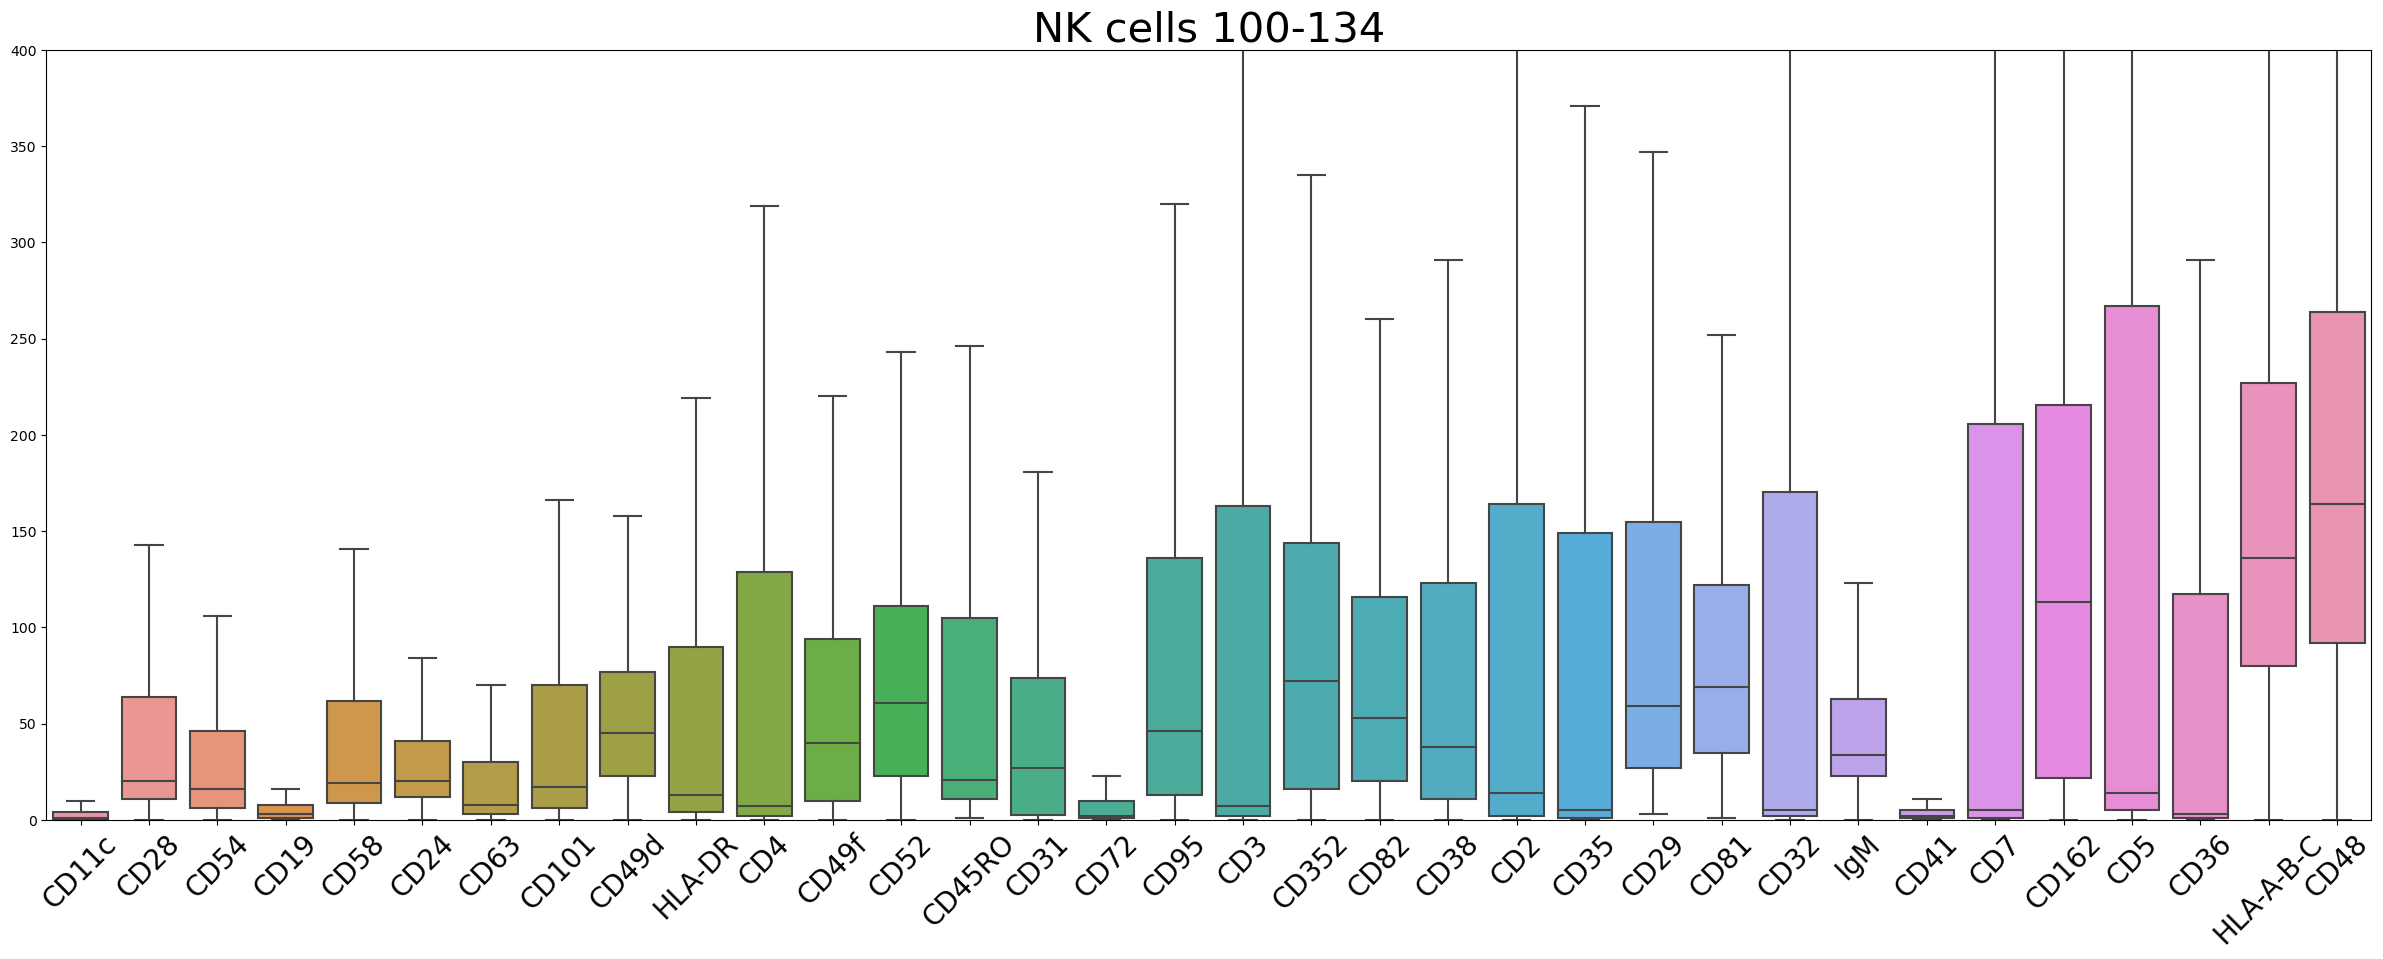

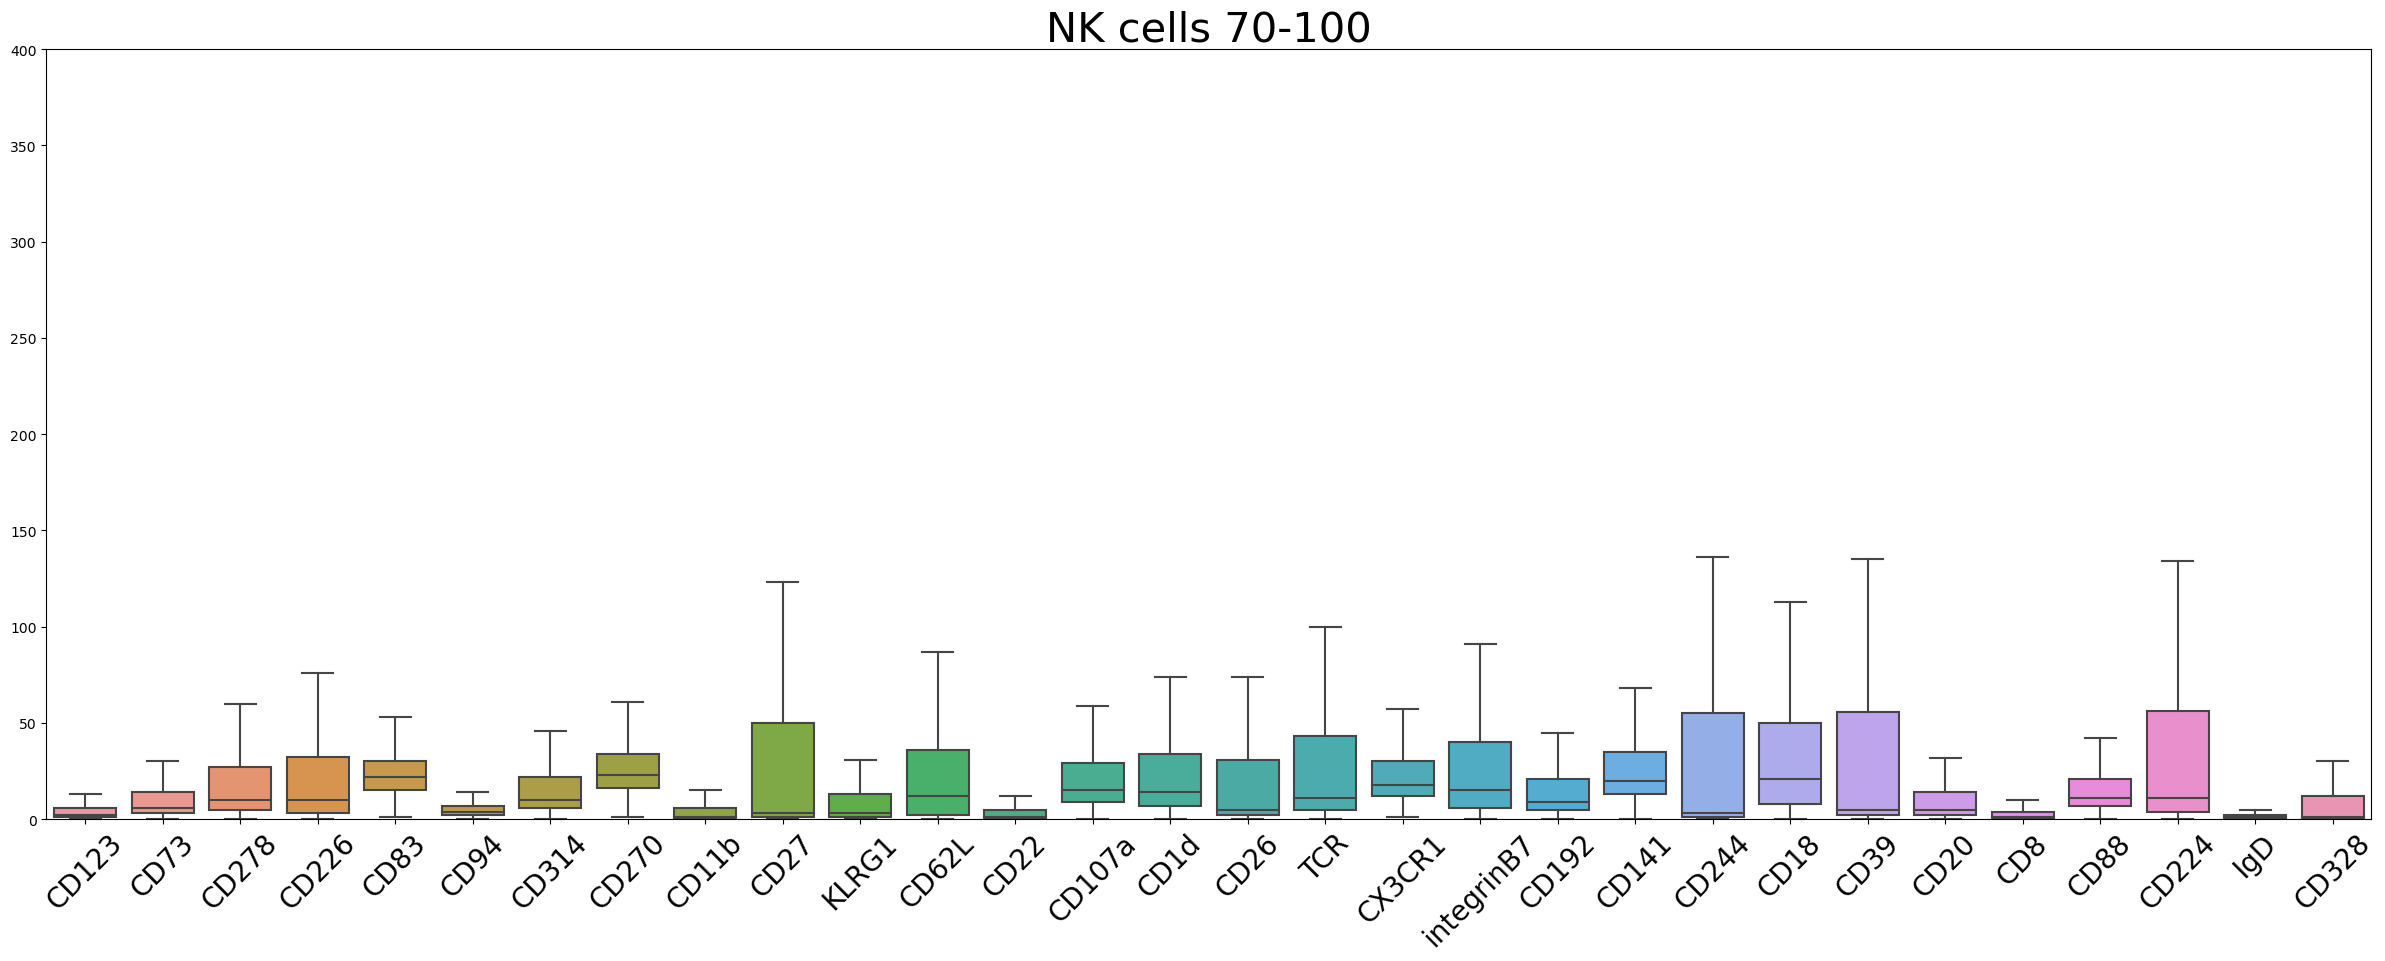

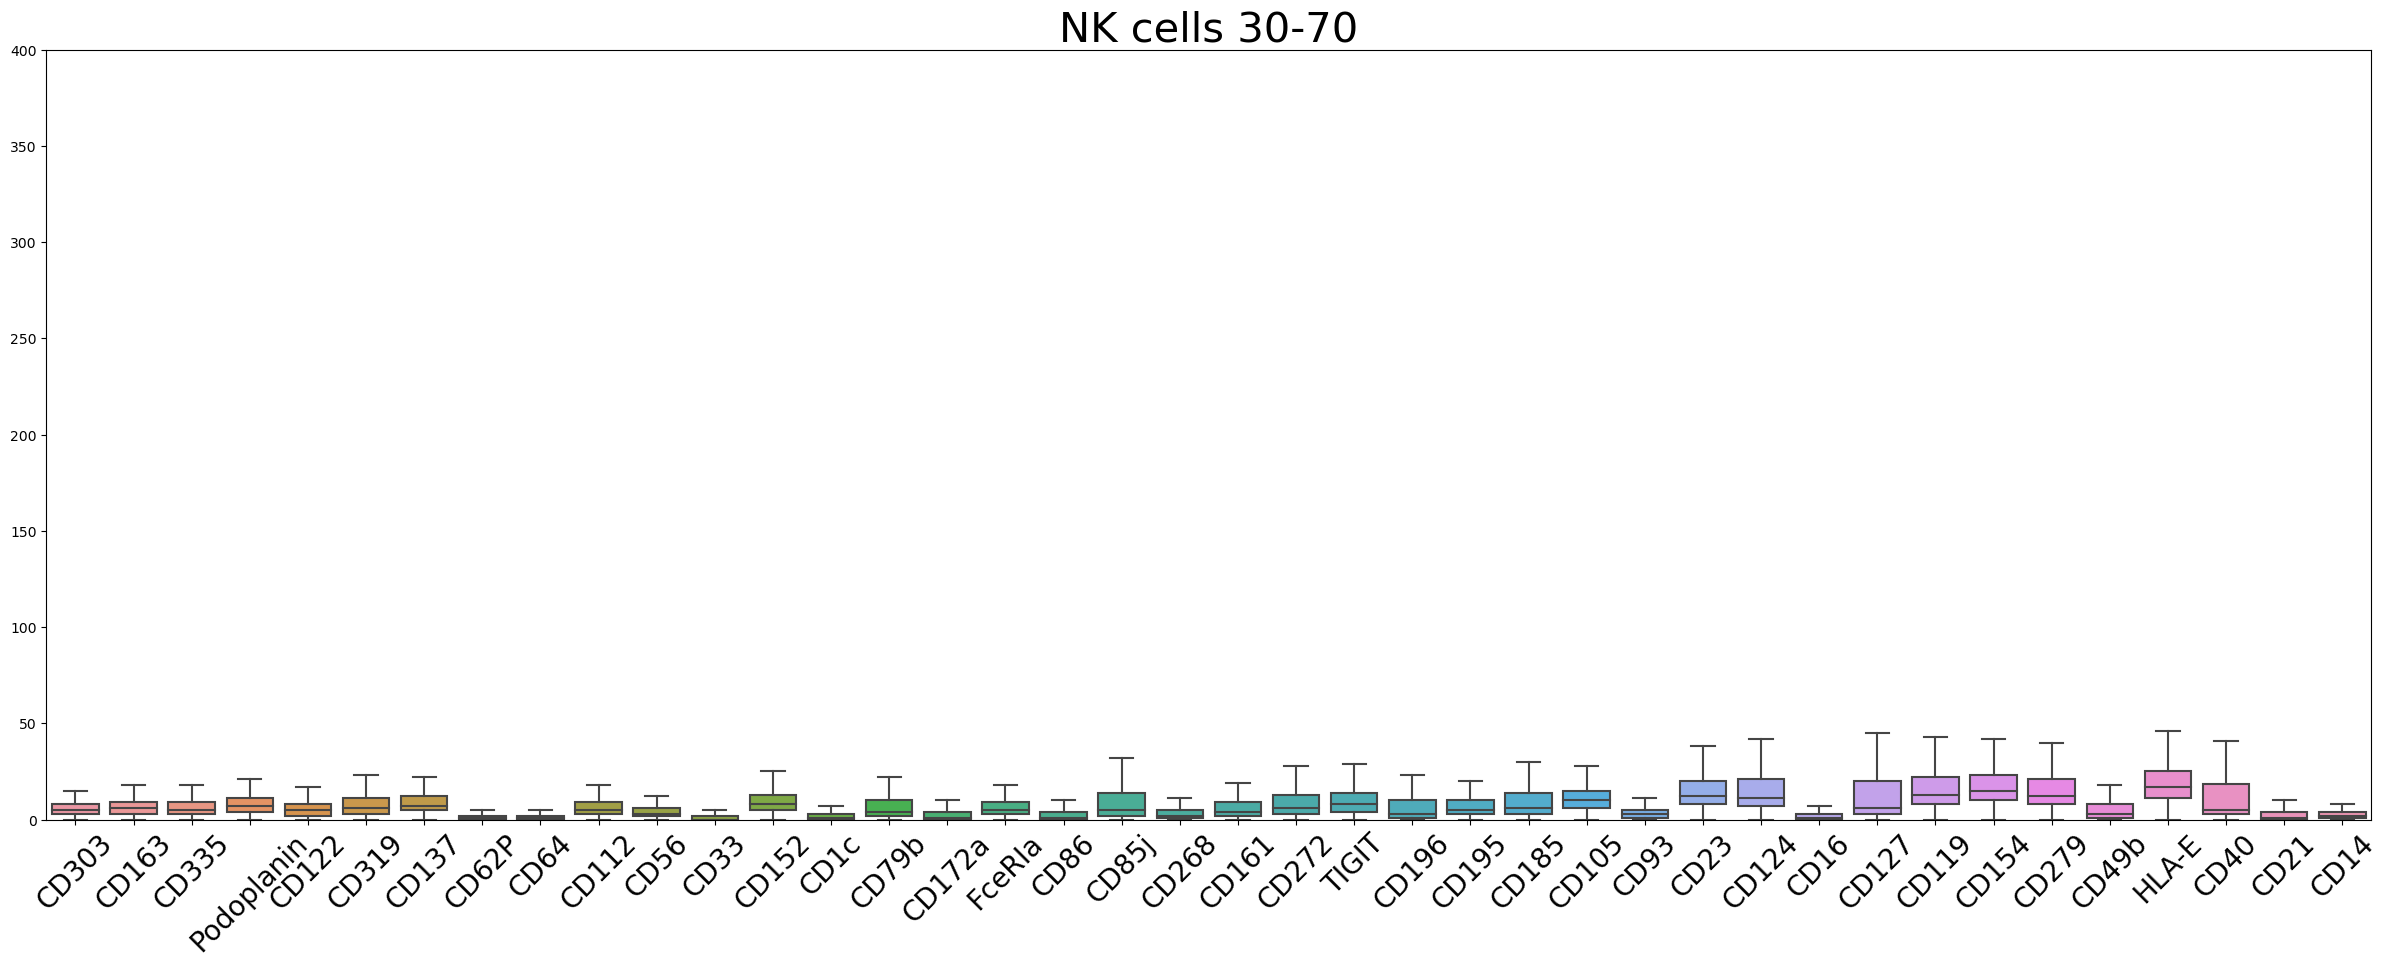

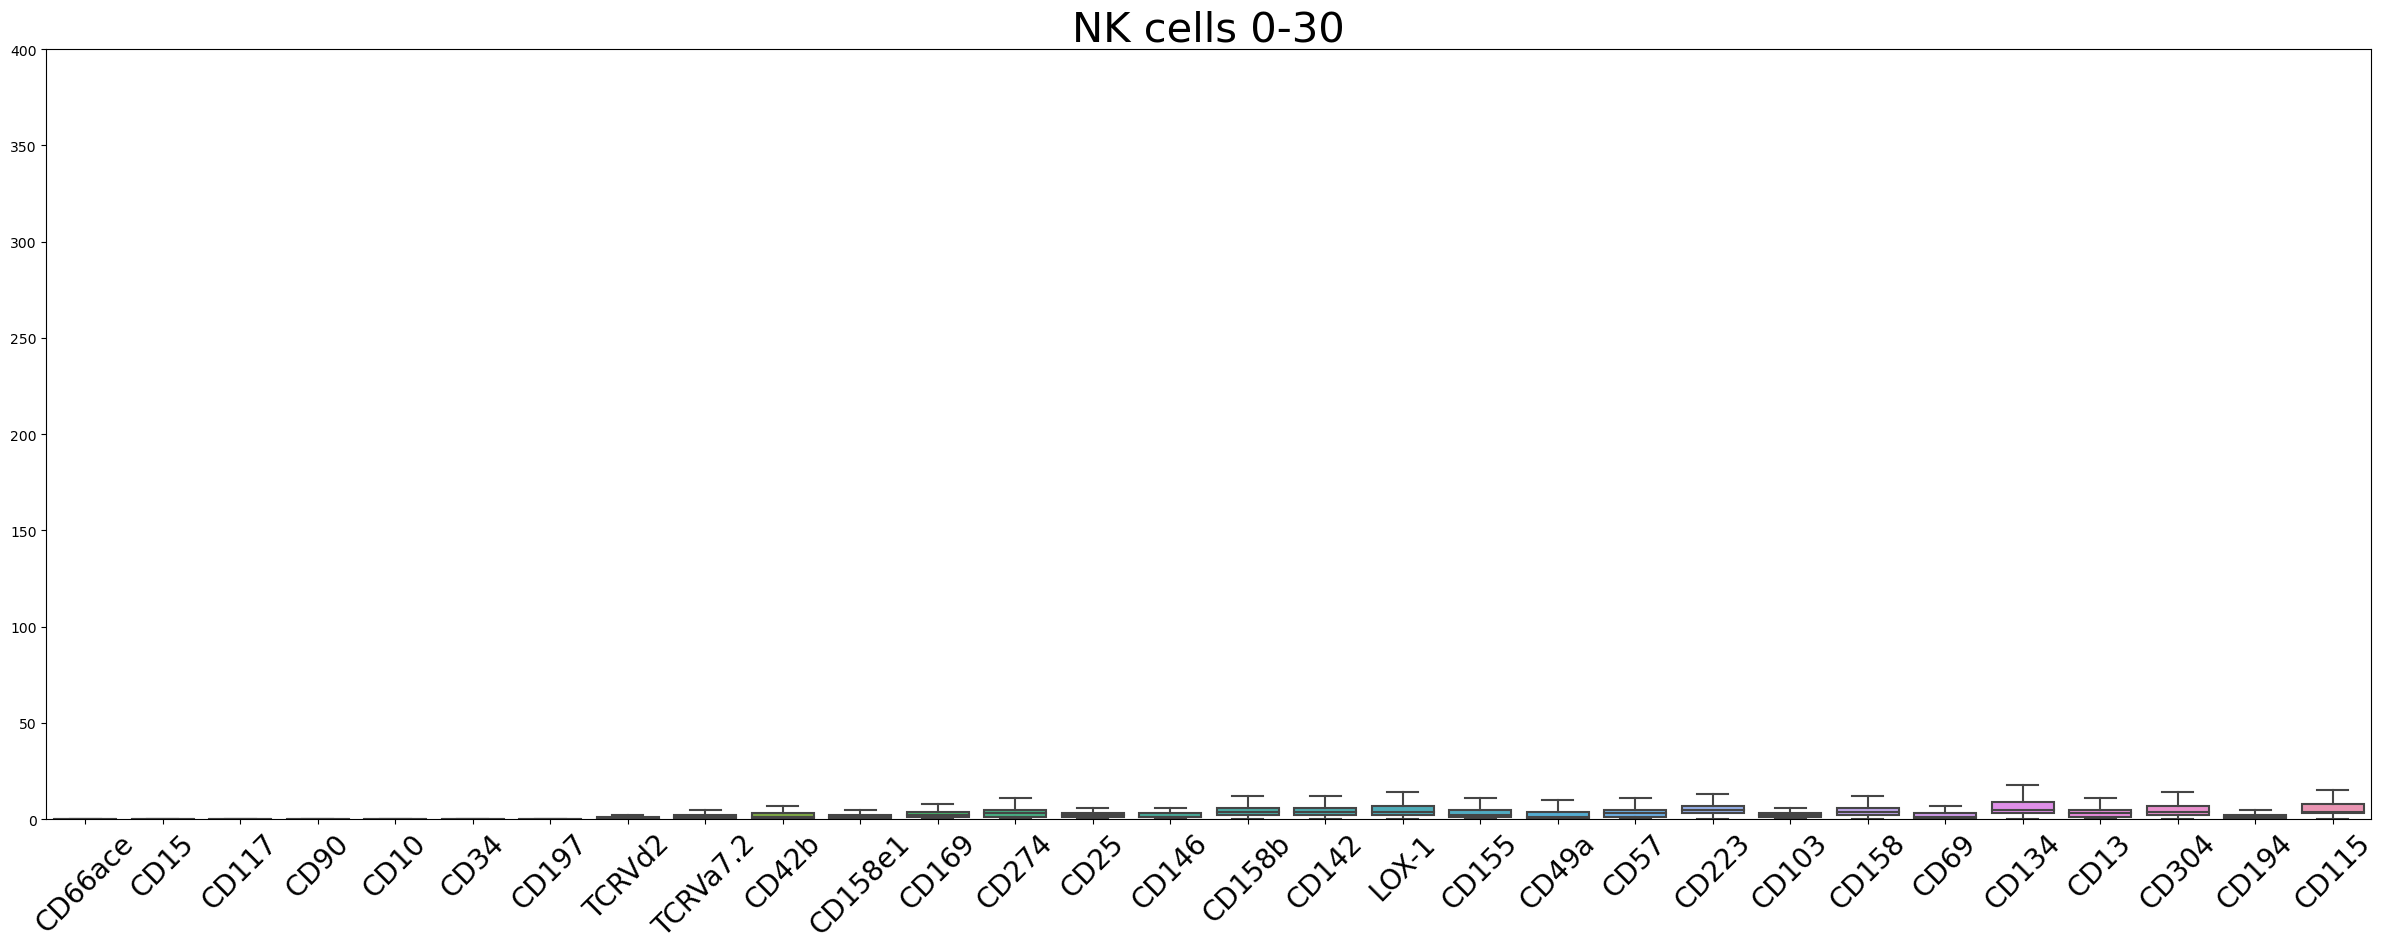

In [20]:
#NK cells

cells= len(nk_prot)

print("In total:", cells, "NK-cells in the sample" )

#From 100 to 134
plt.figure(figsize=(30,10))
plt.ylim(0, 400)
a=sns.boxplot(data=df_sorted_all.iloc[0:26775,100:134],  fliersize=0)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)
plt.title("NK cells 100-134", fontsize=30)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)

#From 70 to 100

plt.figure(figsize=(30,10))
plt.ylim(0, 400)
b=sns.boxplot(data=df_sorted_all.iloc[0:26775,70:100],  fliersize=0)

b.set_xticklabels(b.get_xticklabels(),rotation=45) 
b.tick_params(axis='x', labelsize=20)
plt.title("NK cells 70-100", fontsize=30)

b.set_xticklabels(b.get_xticklabels(),rotation=45) 
b.tick_params(axis='x', labelsize=20)

#From 30 to 70
plt.figure(figsize=(30,10))
plt.ylim(0, 400)
c=sns.boxplot(data=df_sorted_all.iloc[0:26775,30:70],  fliersize=0)

c.set_xticklabels(c.get_xticklabels(),rotation=45) 
c.tick_params(axis='x', labelsize=20)
plt.title("NK cells 30-70", fontsize=30)

c.set_xticklabels(c.get_xticklabels(),rotation=45) 
c.tick_params(axis='x', labelsize=20)

#From 0 to 30
plt.figure(figsize=(30,10))
plt.ylim(0, 400)
d=sns.boxplot(data=df_sorted_all.iloc[0:26775,0:30],  fliersize=0)

d.set_xticklabels(d.get_xticklabels(),rotation=45) 
d.tick_params(axis='x', labelsize=20)
plt.title("NK cells 0-30", fontsize=30)

d.set_xticklabels(d.get_xticklabels(),rotation=45) 
d.tick_params(axis='x', labelsize=20)


In total: 202 NK-cells in the sample


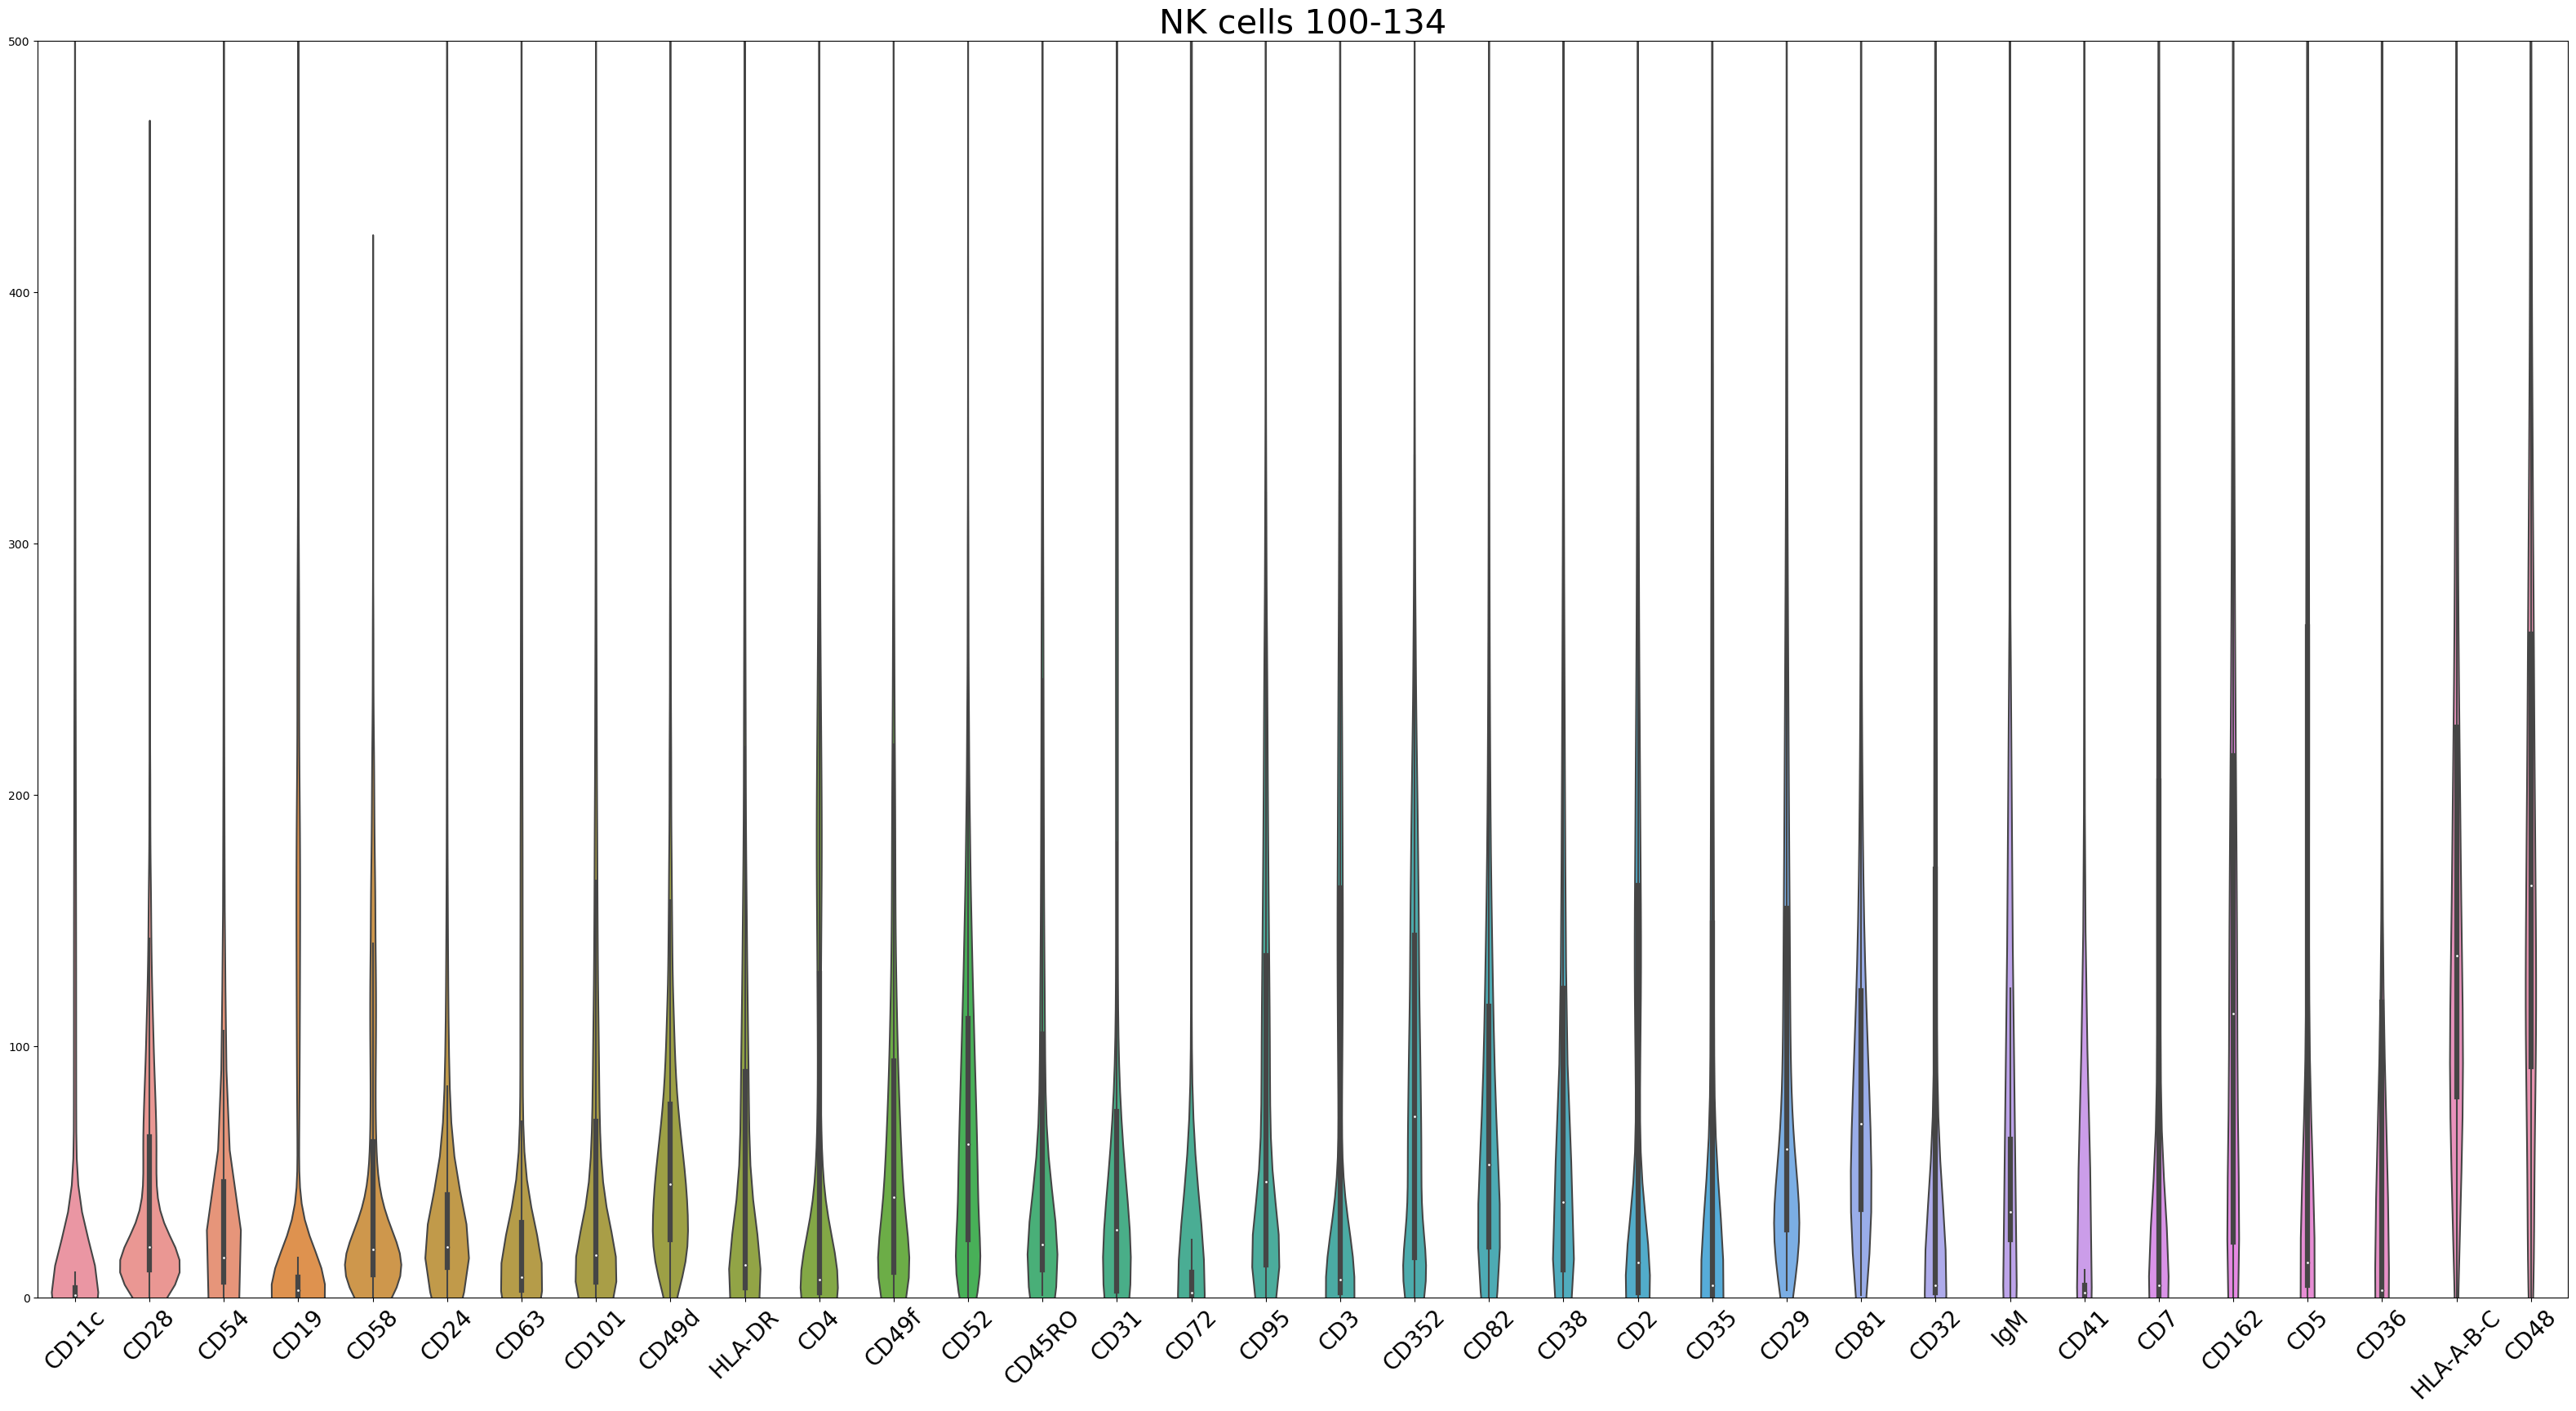

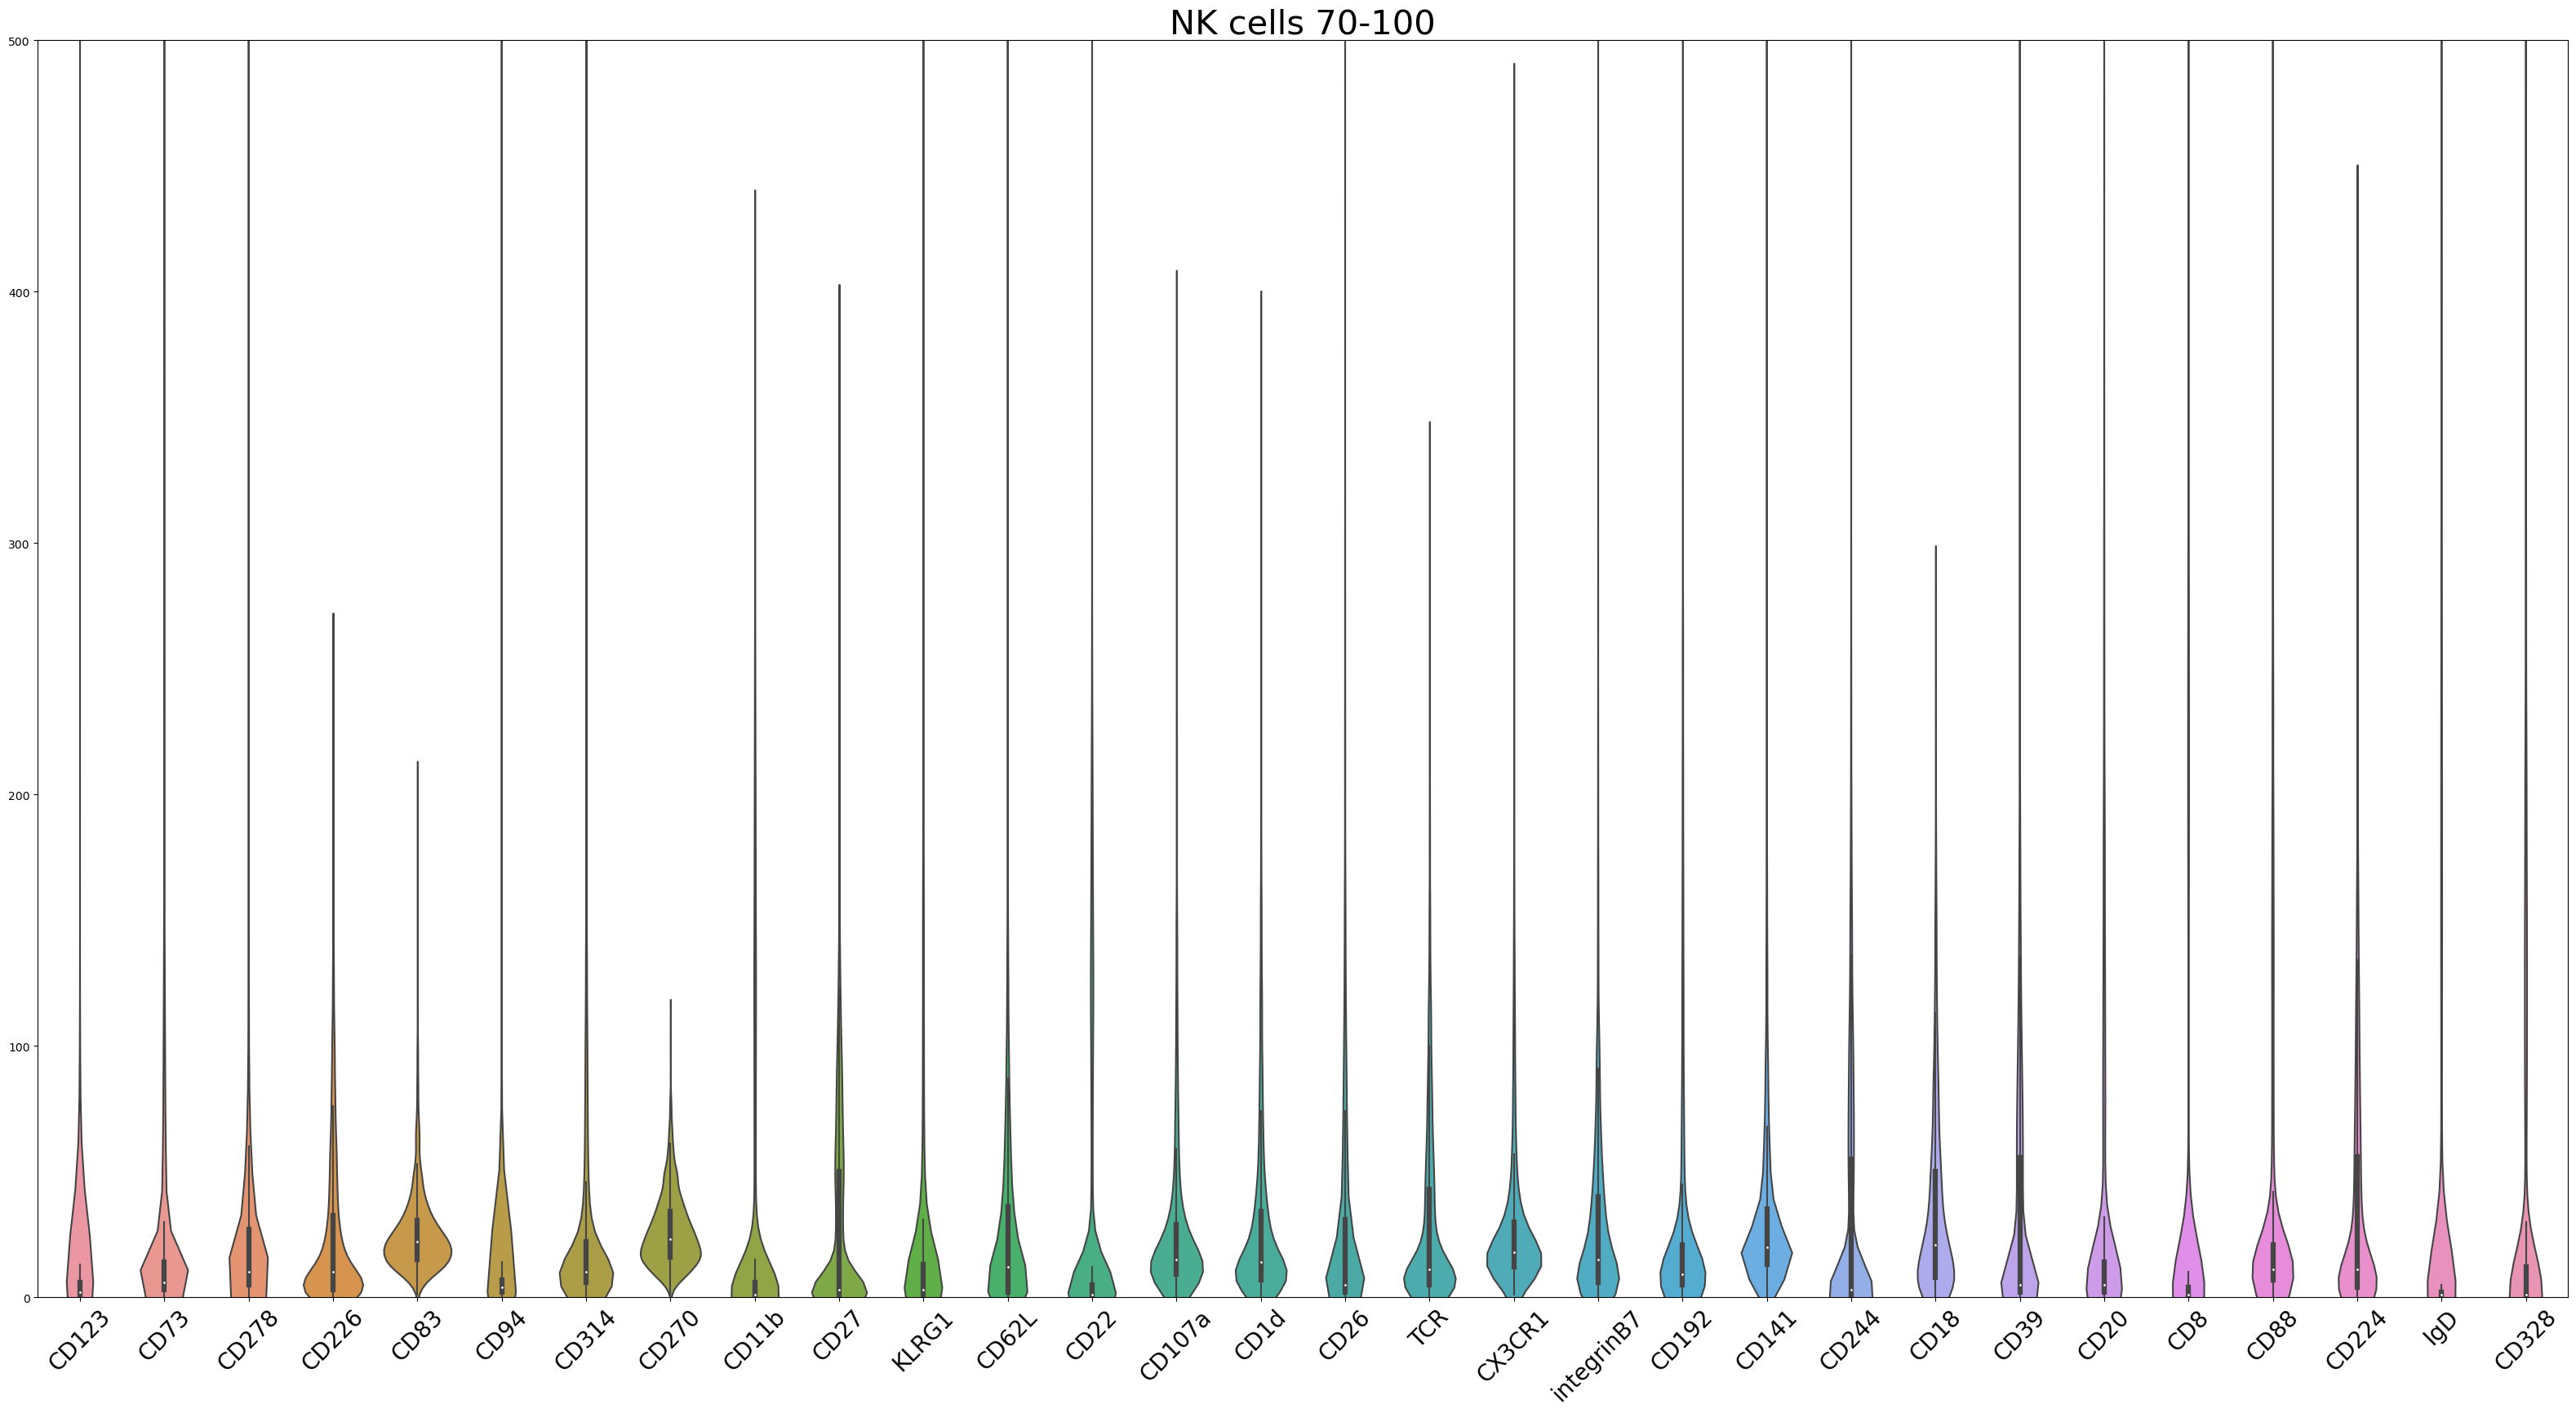

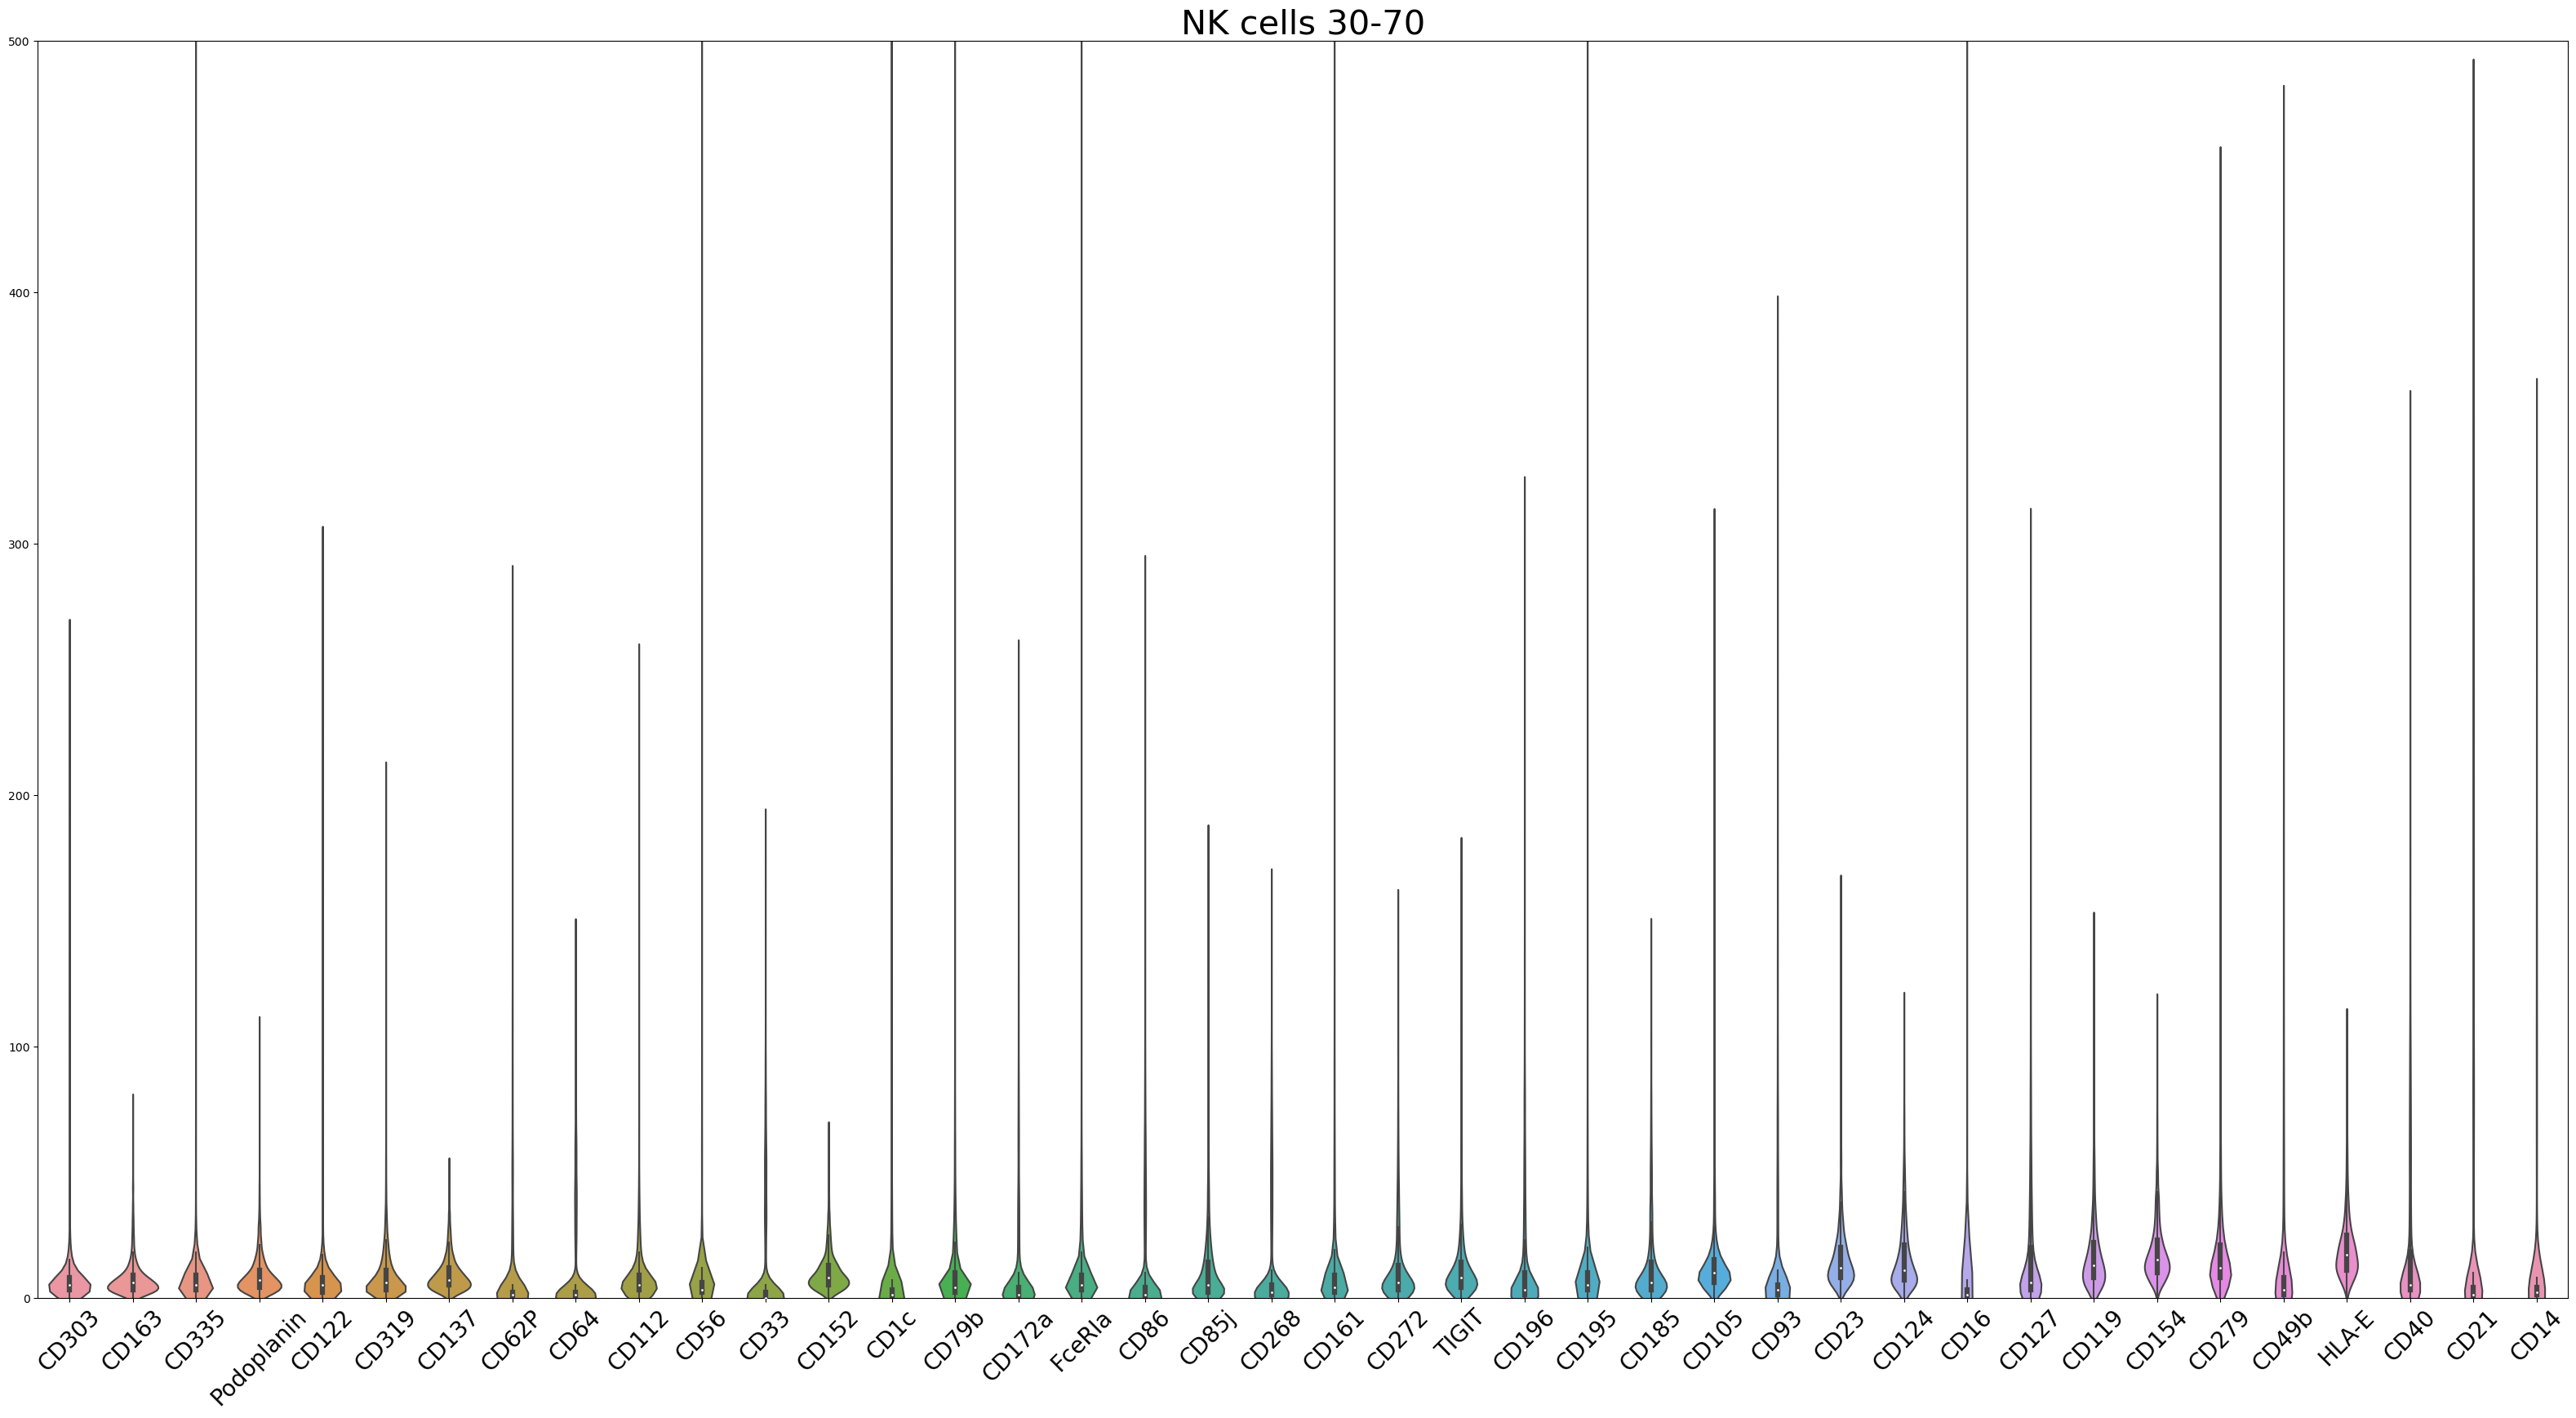

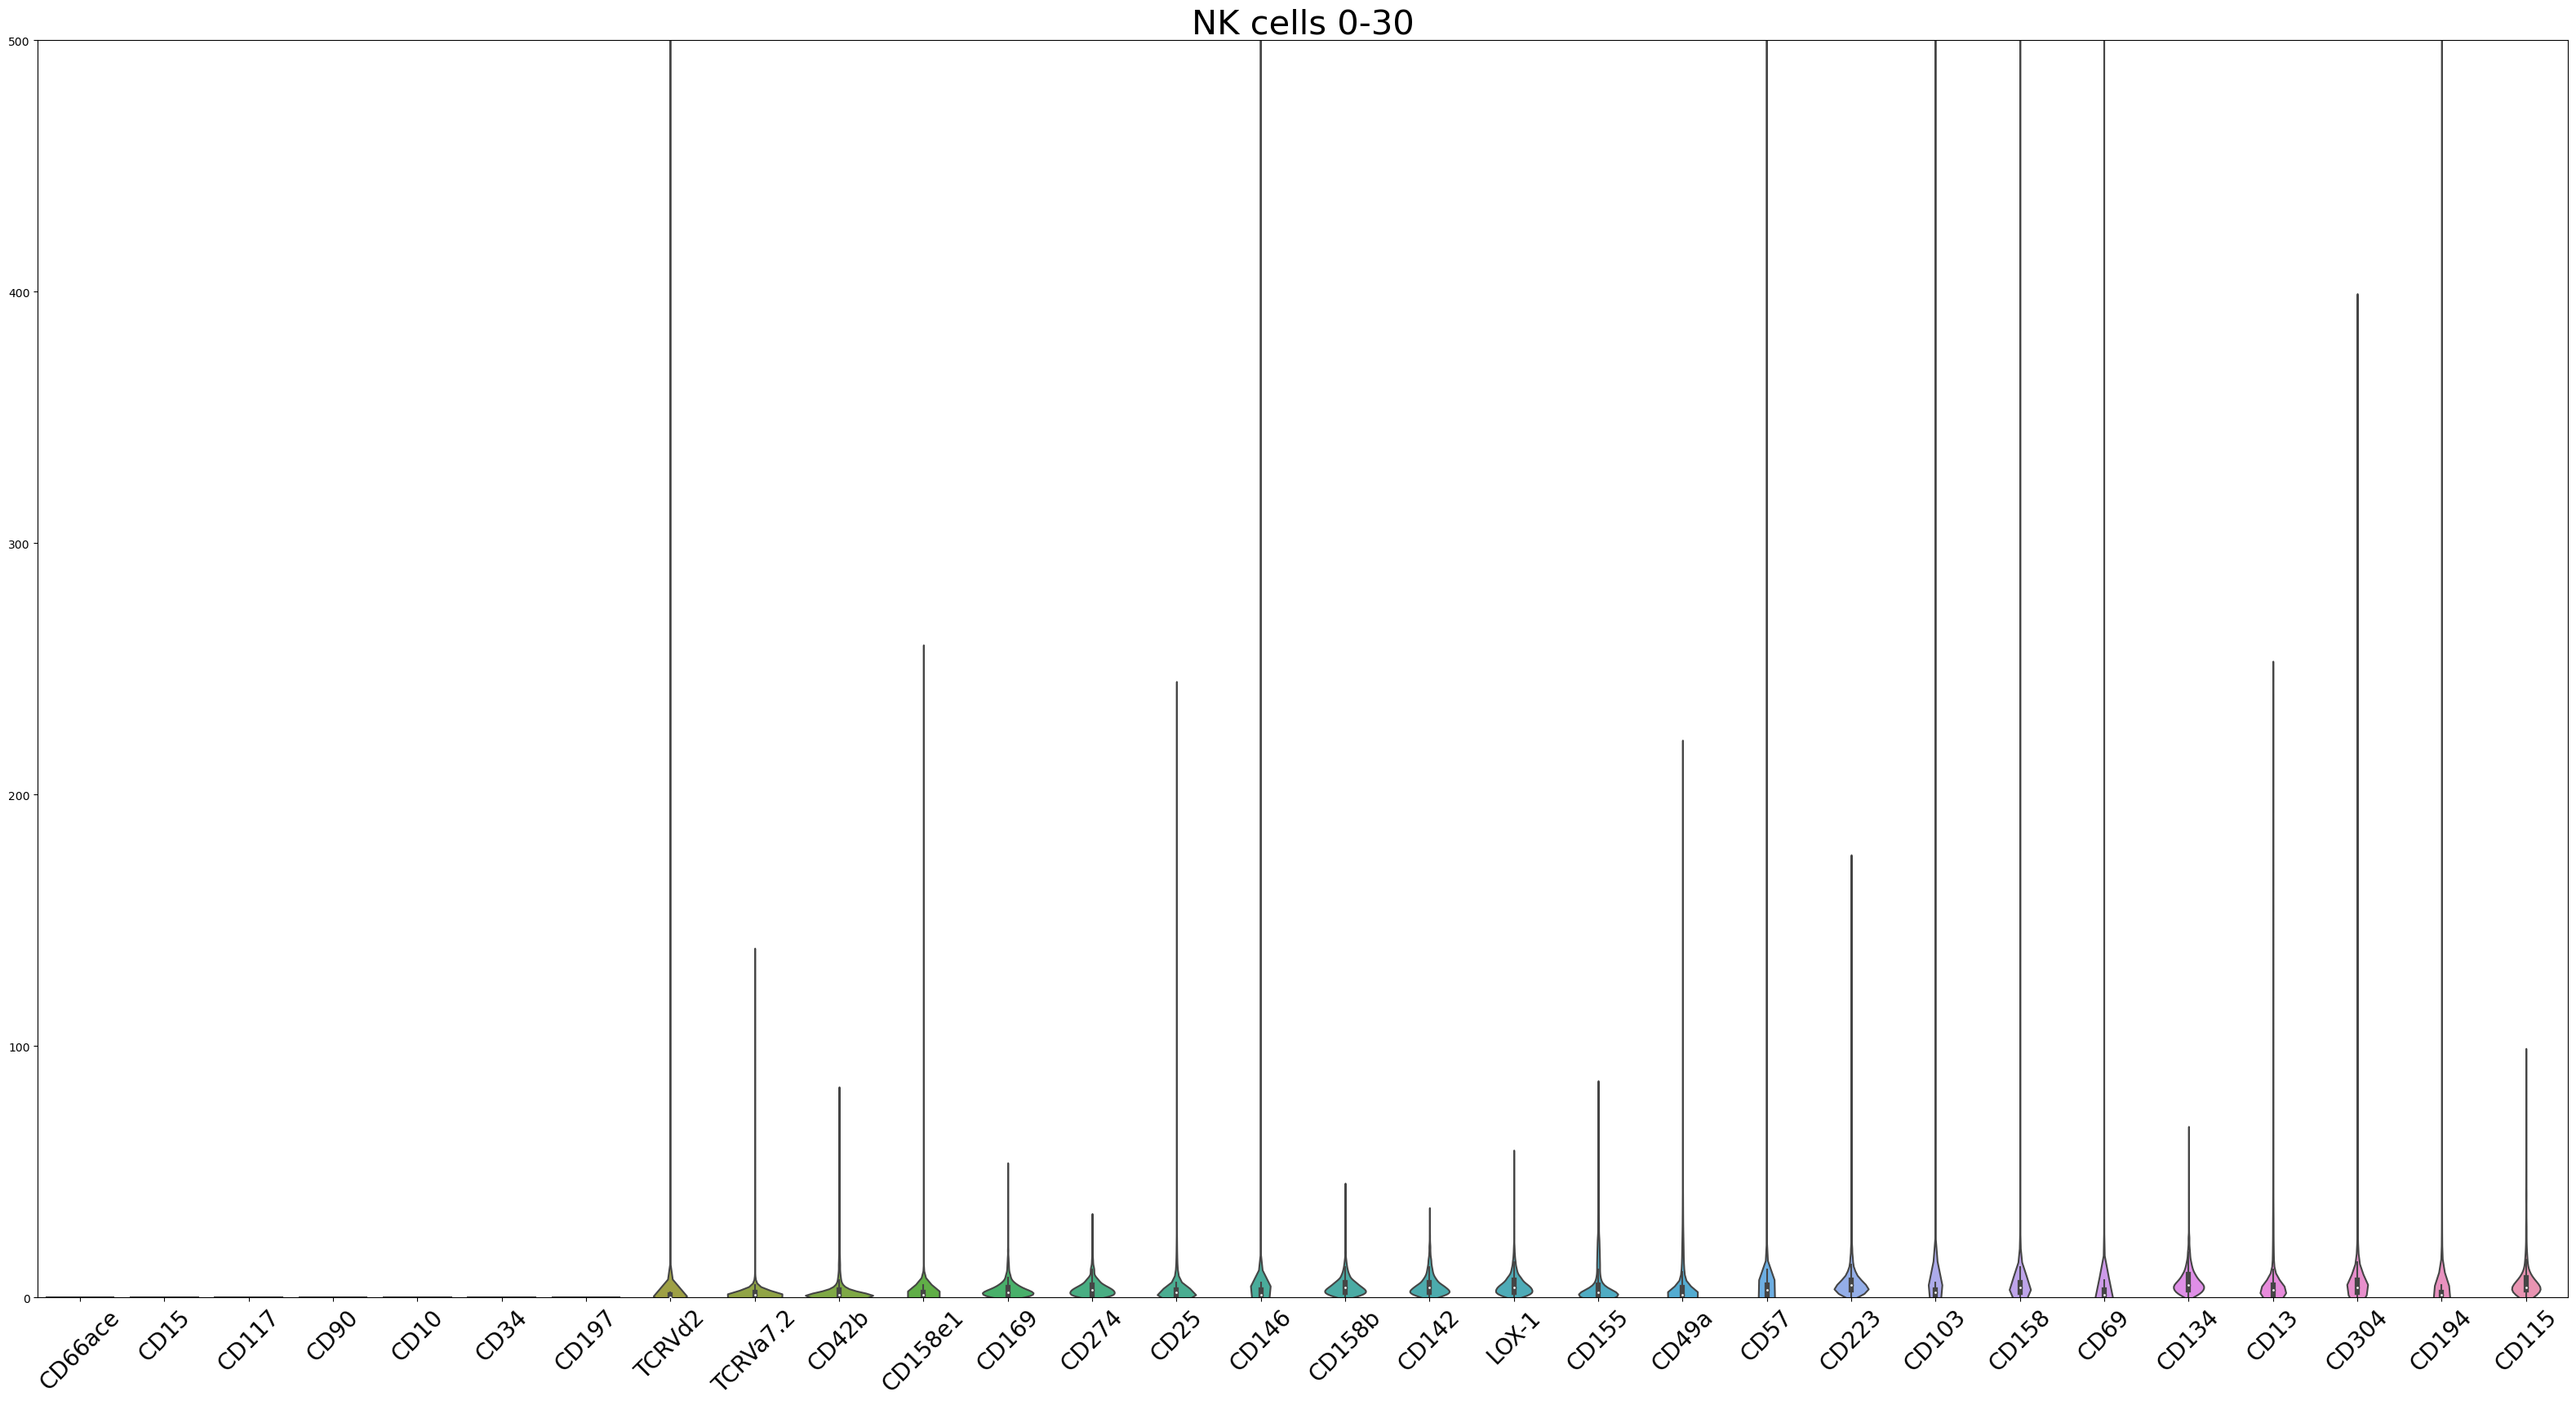

In [21]:
#NK cells

cells= len(nk_prot)

print("In total:", cells, "NK-cells in the sample" )

#From 100 to 134
plt.figure(figsize=(40,20))
plt.ylim(0, 500)
a=sns.violinplot(data=df_sorted_all.iloc[0:26775,100:134],  fliersize=0)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)
plt.title("NK cells 100-134", fontsize=30)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)

#From 70 to 100

plt.figure(figsize=(40,20))
plt.ylim(0, 500)
b=sns.violinplot(data=df_sorted_all.iloc[0:26775,70:100],  fliersize=0)

b.set_xticklabels(b.get_xticklabels(),rotation=45) 
b.tick_params(axis='x', labelsize=20)
plt.title("NK cells 70-100", fontsize=30)

b.set_xticklabels(b.get_xticklabels(),rotation=45) 
b.tick_params(axis='x', labelsize=20)

#From 30 to 70
plt.figure(figsize=(40,20))
plt.ylim(0, 500)
c=sns.violinplot(data=df_sorted_all.iloc[0:26775,30:70],  fliersize=0)

c.set_xticklabels(c.get_xticklabels(),rotation=45) 
c.tick_params(axis='x', labelsize=20)
plt.title("NK cells 30-70", fontsize=30)

c.set_xticklabels(c.get_xticklabels(),rotation=45) 
c.tick_params(axis='x', labelsize=20)

#From 0 to 30
plt.figure(figsize=(40,20))
plt.ylim(0, 500)
d=sns.violinplot(data=df_sorted_all.iloc[0:26775,0:30],  fliersize=0)

d.set_xticklabels(d.get_xticklabels(),rotation=45) 
d.tick_params(axis='x', labelsize=20)
plt.title("NK cells 0-30", fontsize=30)

d.set_xticklabels(d.get_xticklabels(),rotation=45) 
d.tick_params(axis='x', labelsize=20)



In [22]:
#To exclude columns that contain only zeros, all cell types included

prot = pd.DataFrame(prot)
prot != 0
(prot != 0).any(axis=0)
prot.loc[:, (prot != 0).any(axis=0)]
prot = prot.loc[:, (prot != 0).any(axis=0)]

for col in prot:
    print(col)

CD86
CD274
CD270
CD155
CD112
CD47
CD48
CD40
CD154
CD52
CD3
CD8
CD56
CD19
CD33
CD11c
HLA-A-B-C
CD45RA
CD123
CD7
CD105
CD49f
CD194
CD4
CD44
CD14
CD16
CD25
CD45RO
CD279
TIGIT
CD20
CD335
CD31
Podoplanin
CD146
IgM
CD5
CD195
CD32
CD196
CD185
CD103
CD69
CD62L
CD161
CD152
CD223
KLRG1
CD27
CD107a
CD95
CD134
HLA-DR
CD1c
CD11b
CD64
CD141
CD1d
CD314
CD35
CD57
CD272
CD278
CD58
CD39
CX3CR1
CD24
CD21
CD11a
CD79b
CD244
CD169
integrinB7
CD268
CD42b
CD54
CD62P
CD119
TCR
CD192
CD122
FceRIa
CD41
CD137
CD163
CD83
CD124
CD13
CD2
CD226
CD29
CD303
CD49b
CD81
IgD
CD18
CD28
CD38
CD127
CD45
CD22
CD71
CD26
CD115
CD63
CD304
CD36
CD172a
CD72
CD158
CD93
CD49a
CD49d
CD73
CD9
TCRVa7.2
TCRVd2
LOX-1
CD158b
CD158e1
CD142
CD319
CD352
CD94
CD162
CD85j
CD23
CD328
HLA-E
CD82
CD101
CD88
CD224


In [23]:
#To exclude columns that contain only zeros from NK-only file

nk_prot = pd.DataFrame(nk_prot)
nk_prot != 0
(nk_prot != 0).any(axis=0)
nk_prot.loc[:, (nk_prot != 0).any(axis=0)]
nk_prot = nk_prot.loc[:, (nk_prot != 0).any(axis=0)]

for col in nk_prot:
    print(col)

CD86
CD274
CD270
CD155
CD112
CD47
CD48
CD40
CD154
CD52
CD3
CD8
CD56
CD19
CD33
CD11c
HLA-A-B-C
CD45RA
CD123
CD7
CD105
CD49f
CD194
CD4
CD44
CD14
CD16
CD25
CD45RO
CD279
TIGIT
CD20
CD335
CD31
Podoplanin
CD146
IgM
CD5
CD195
CD32
CD196
CD185
CD103
CD69
CD62L
CD161
CD152
CD223
KLRG1
CD27
CD107a
CD95
CD134
HLA-DR
CD1c
CD11b
CD64
CD141
CD1d
CD314
CD35
CD57
CD272
CD278
CD58
CD39
CX3CR1
CD24
CD21
CD11a
CD79b
CD244
CD169
integrinB7
CD268
CD42b
CD54
CD62P
CD119
TCR
CD192
CD122
FceRIa
CD41
CD137
CD163
CD83
CD124
CD13
CD2
CD226
CD29
CD303
CD49b
CD81
IgD
CD18
CD28
CD38
CD127
CD45
CD22
CD71
CD26
CD115
CD63
CD304
CD36
CD172a
CD72
CD158
CD93
CD49a
CD49d
CD73
CD9
TCRVa7.2
TCRVd2
LOX-1
CD158b
CD158e1
CD142
CD319
CD352
CD94
CD162
CD85j
CD23
CD328
HLA-E
CD82
CD101
CD88
CD224


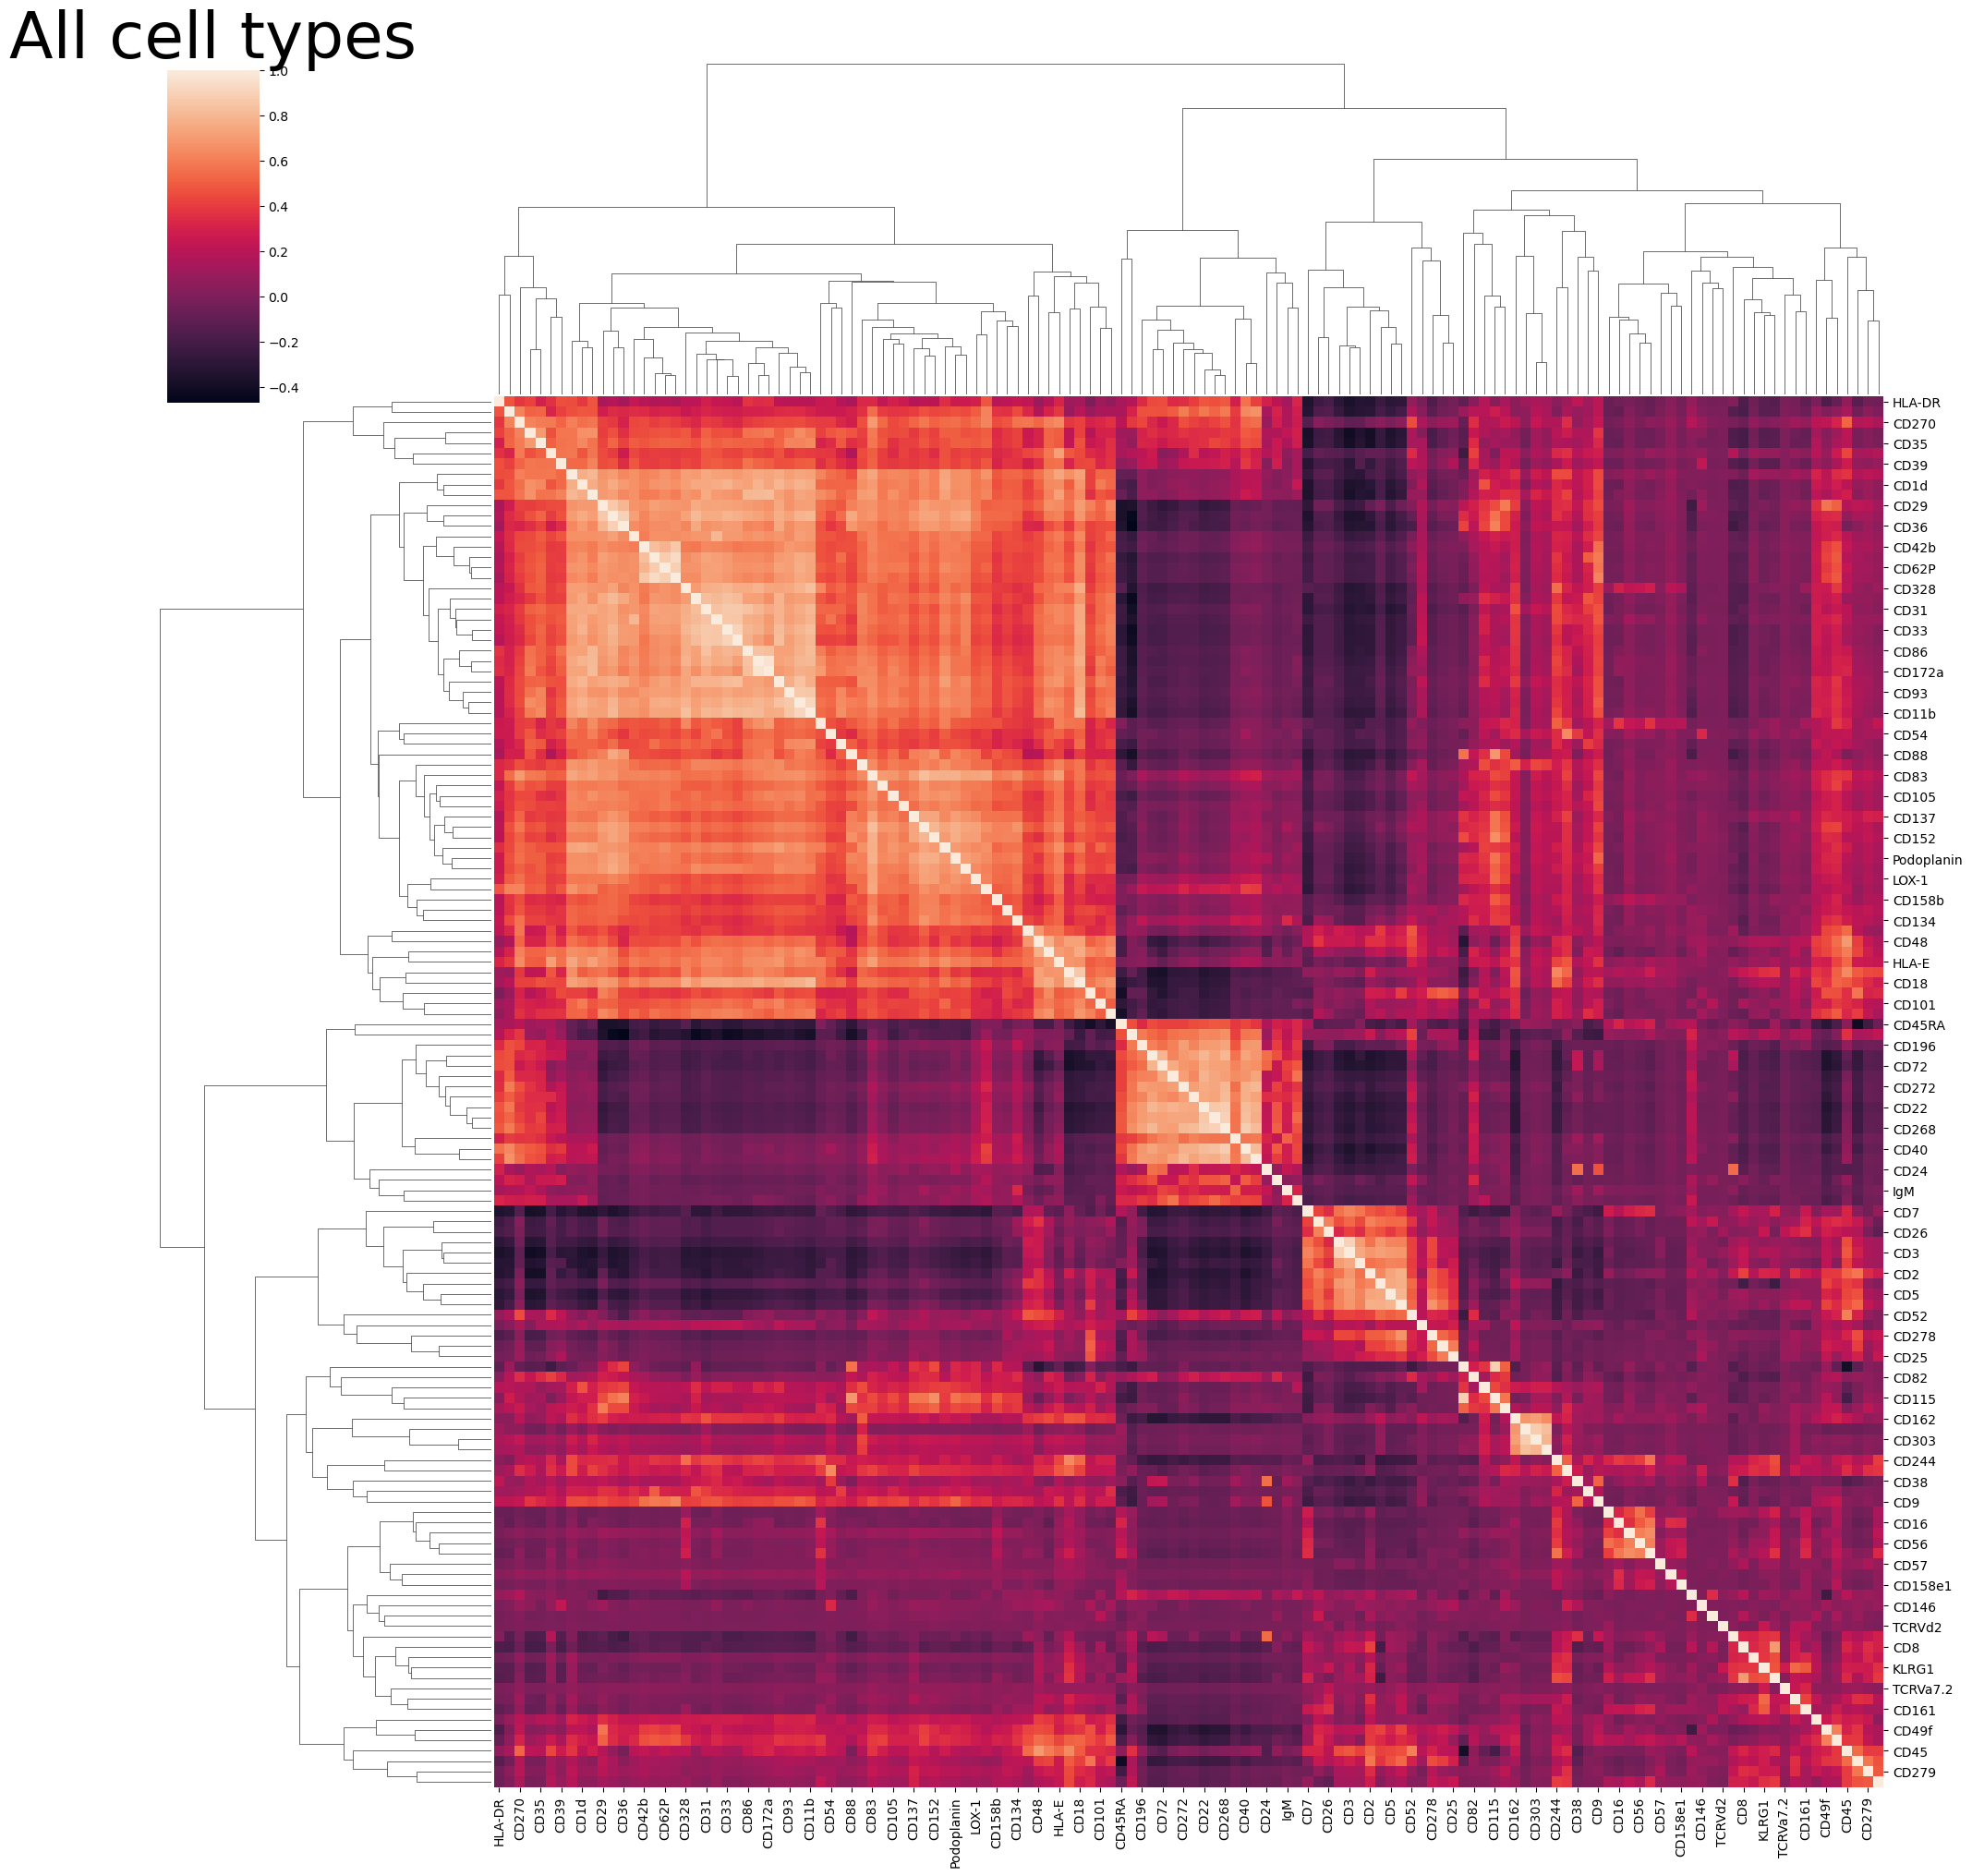

In [24]:
#All cells
matrix1=prot.corr(method='pearson', min_periods=1)
sns.clustermap(matrix1, figsize=(20,20))
plt.title('All cell types', fontsize = 50) ;



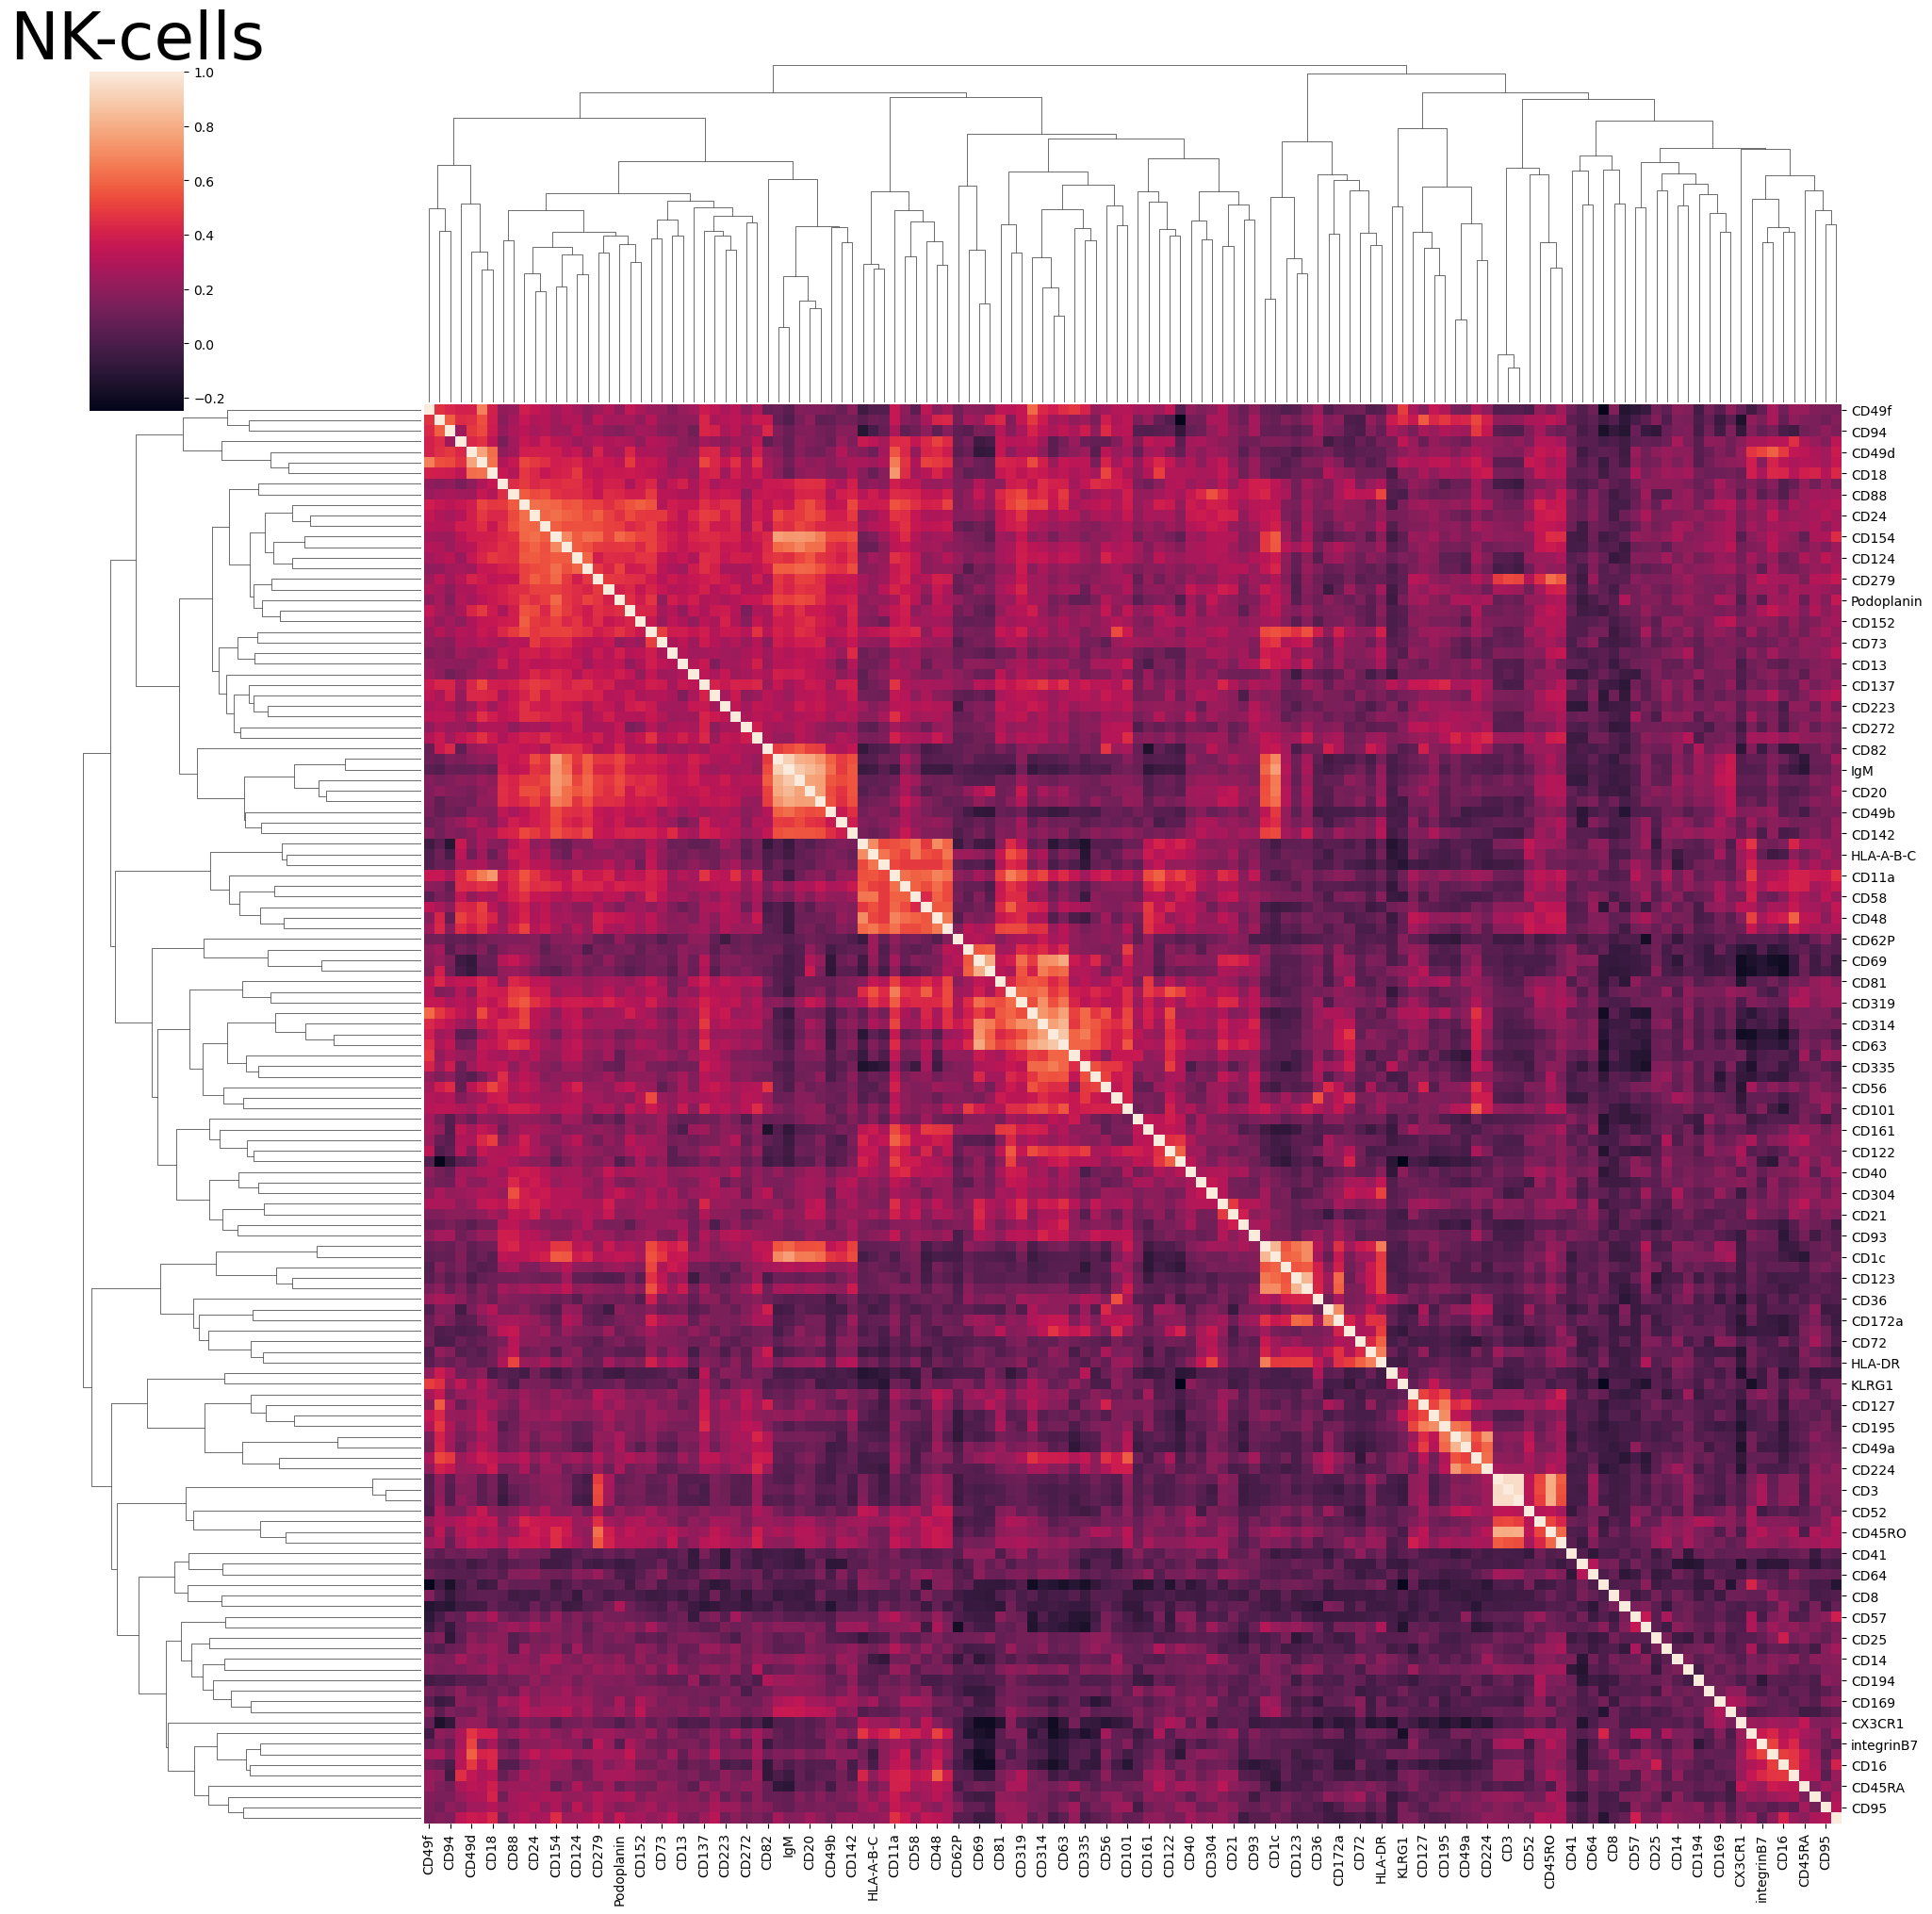

In [25]:
#NK cells
matrix3=nk_prot.corr(method='pearson', min_periods=1)
sns.clustermap(matrix3, figsize=(20,20))
plt.title('NK-cells', fontsize = 50) ;


In [26]:
#Adding protein data to anndata file for UMAPs, all cell types

a = adata_sample.obs
b = prot

neurips_umap=pd.concat([a, b], axis=1)

adata_sample.obs=neurips_umap
adata_sample

AnnData object with n_obs × n_vars = 4123 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group', 'CD86', 'CD274', 'CD270', 'CD155', 'CD112', 'CD47', 'CD48', 'CD40', 'CD154', 'CD52', 'CD3', 'CD8', 'CD56', 'CD19', 'CD33', 'CD11c', 'HLA-A-B-C', 'CD45RA', 'CD123', 'CD7', 'CD105', 'CD49f', 'CD194', 'CD4', 'CD44', 'CD14', 'CD16', 'CD25', 'CD45RO', 'CD279', 'TIGIT', 'CD20', 'CD335', 'CD31', 'Podoplanin', 'CD146', 'IgM', 'CD5', 'CD195', 'CD32', 'CD196', 'CD185', 'CD103', 'CD69', 'CD62L', 'CD161', 'CD152', 'CD223', 'KLRG1', 'CD27', 'CD107a', 'CD95', 'CD134', 'HLA-DR', 'CD1c', 'CD11b', 'CD64', 'CD141', 'CD1d', 'CD314', 'CD35', 'CD57', 'CD272', 'CD278', 'CD58', 'CD39', 'CX3CR1', 'CD24',

In [27]:
adata_sample.obs

,cell_type,n_genes,percent_mito,percent_ribo,n_counts,leiden_r2,leiden_r2_n_genes_MAD_diff,leiden_r2_n_counts_MAD_diff,leiden_r2_percent_mito_MAD_diff,filter,...,CD94,CD162,CD85j,CD23,CD328,HLA-E,CD82,CD101,CD88,CD224
TACAGGTGTTAGAGTA-1-s1d1,CD14+ Mono,2573,0.080571,0.128628,4877.603516,7,0.877358,1.774512,0.089021,False,...,9,338,26,49,99,30,26,146,24,131
AGGATCTAGGTCTACT-1-s1d1,Naive CD20+ B IGKC+,1857,0.069758,0.240966,5331.984375,0,0.689815,3.165899,1.205523,False,...,1,13,6,16,0,18,116,0,9,4
GTAGAAAGTGACACAG-1-s1d1,HSC,2319,0.061534,0.328938,5722.034180,1,0.857605,1.804532,0.198431,False,...,0,114,3,4,131,12,19,11,8,430
GACCAATCAATTTCGG-1-s1d1,NK CD158e1+,548,0.167715,0.067086,4946.607910,18,1.207792,1.388939,0.371164,False,...,294,165,6,14,55,14,3,4,6,1
TTCCGGTAGTTGTAAG-1-s1d1,CD14+ Mono,2575,0.099157,0.177984,6254.179199,10,0.348924,2.692045,1.184054,False,...,7,159,28,20,200,32,118,84,87,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GTCGAATAGTTTCGGT-1-s1d1,Naive CD20+ B IGKC+,1443,0.074594,0.375195,6701.344727,0,1.226852,0.006961,0.796488,False,...,0,18,12,18,1,19,60,4,11,0
AGTAGTCTCTGGGCGT-1-s1d1,CD4+ T activated integrinB7+,1015,0.143939,0.442929,9146.781250,1,3.362460,3.170011,5.878488,False,...,1,75,5,9,2,30,49,61,7,153
GCCCGAAGTATGGAGC-1-s1d1,CD4+ T naive,1781,0.065208,0.447616,7842.610840,2,0.034951,0.138908,0.379975,False,...,12,136,1,9,1,24,31,14,6,11
CTACATTAGCGCGTTC-1-s1d1,CD14+ Mono,2452,0.088275,0.159608,5146.533203,10,0.118803,0.548673,0.510742,False,...,7,491,39,40,131,24,149,302,156,98


In [28]:
#Adding protein data to anndata file for UMAPs, all cell types

a = adata_nk.obs
b = nk_prot

adata_nk_umap=pd.concat([a, b], axis=1)

adata_nk.obs=adata_nk_umap

adata_nk

AnnData object with n_obs × n_vars = 202 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group', 'CD86', 'CD274', 'CD270', 'CD155', 'CD112', 'CD47', 'CD48', 'CD40', 'CD154', 'CD52', 'CD3', 'CD8', 'CD56', 'CD19', 'CD33', 'CD11c', 'HLA-A-B-C', 'CD45RA', 'CD123', 'CD7', 'CD105', 'CD49f', 'CD194', 'CD4', 'CD44', 'CD14', 'CD16', 'CD25', 'CD45RO', 'CD279', 'TIGIT', 'CD20', 'CD335', 'CD31', 'Podoplanin', 'CD146', 'IgM', 'CD5', 'CD195', 'CD32', 'CD196', 'CD185', 'CD103', 'CD69', 'CD62L', 'CD161', 'CD152', 'CD223', 'KLRG1', 'CD27', 'CD107a', 'CD95', 'CD134', 'HLA-DR', 'CD1c', 'CD11b', 'CD64', 'CD141', 'CD1d', 'CD314', 'CD35', 'CD57', 'CD272', 'CD278', 'CD58', 'CD39', 'CX3CR1', 'CD24', 

In [29]:
adata_nk.obs["CD56"]

GACCAATCAATTTCGG-1-s1d1     69
TCATTGTCACCAGCGT-1-s1d1     33
ACCATTTCACTCACTC-1-s1d1     75
GATGCTAGTCAGCTTA-1-s1d1     33
TGGATCAAGGTTAAAC-1-s1d1    142
                          ... 
CGGAACCTCGCTGCGA-1-s1d1     71
TGATGGTAGTGGACGT-1-s1d1     42
TCTTCCTTCACCGACG-1-s1d1     93
TCATATCTCCCGGTAG-1-s1d1     65
AAGAACAGTCTGTTAG-1-s1d1     85
Name: CD56, Length: 202, dtype: int64

In [30]:
#NK-cell markers

markers=["CD56", "CD16"]

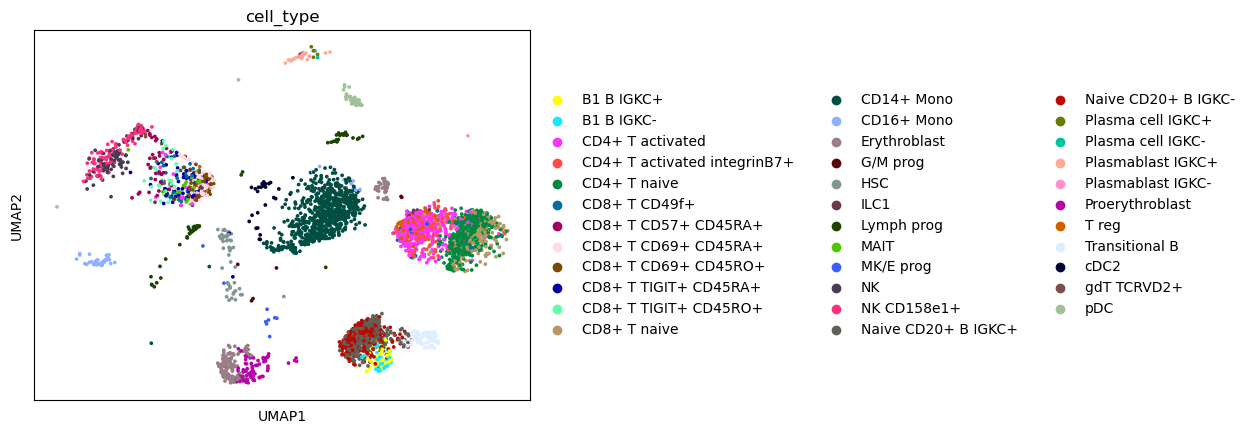

In [31]:
#All cell types
sc.pl.umap(adata_sample, color= "cell_type", color_map= 'viridis')

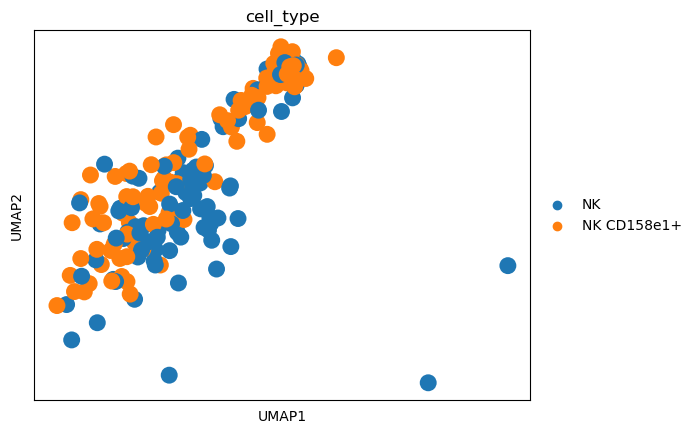

In [32]:
#NK-cells

sc.pl.umap(adata_nk, color = "cell_type", color_map = 'viridis')

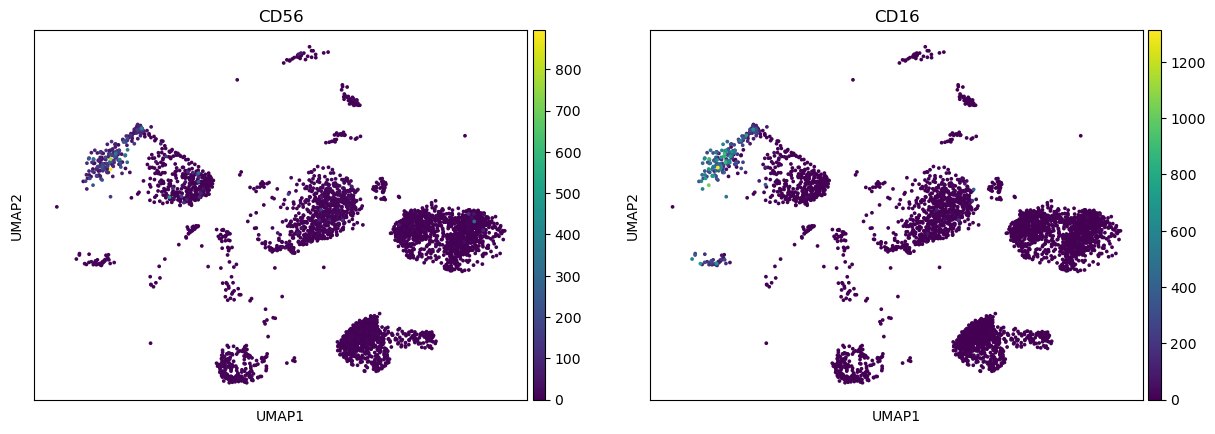

In [33]:
#All cell types

sc.pl.umap(adata_sample, color= markers, color_map= 'viridis')

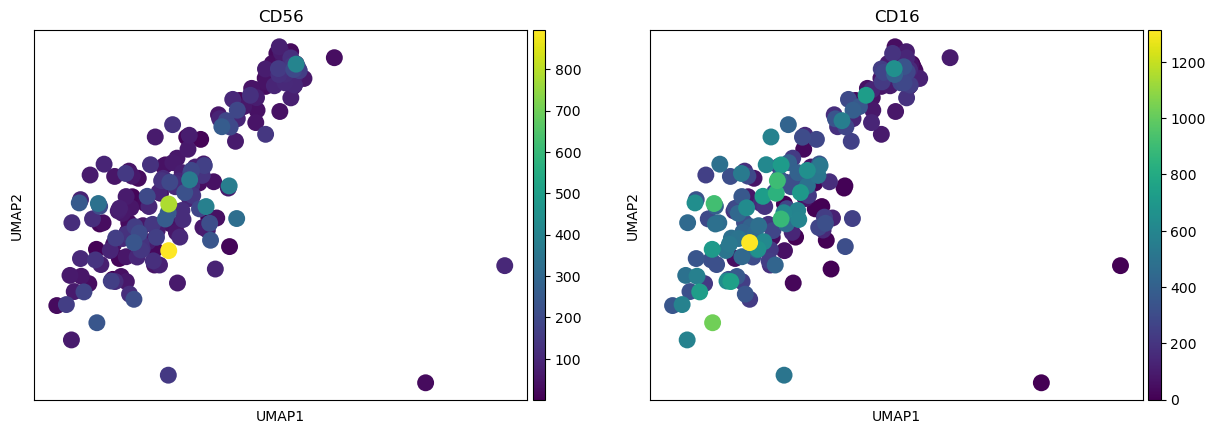

In [34]:
#NK-cells

sc.pl.umap(adata_nk, color = markers, color_map = 'viridis')

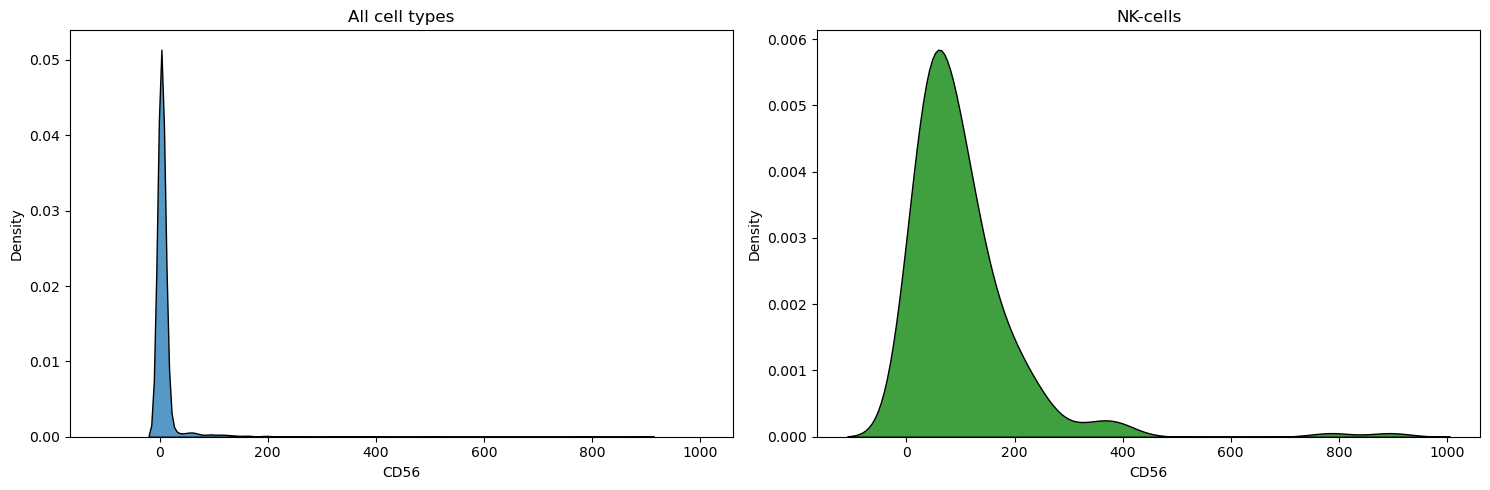

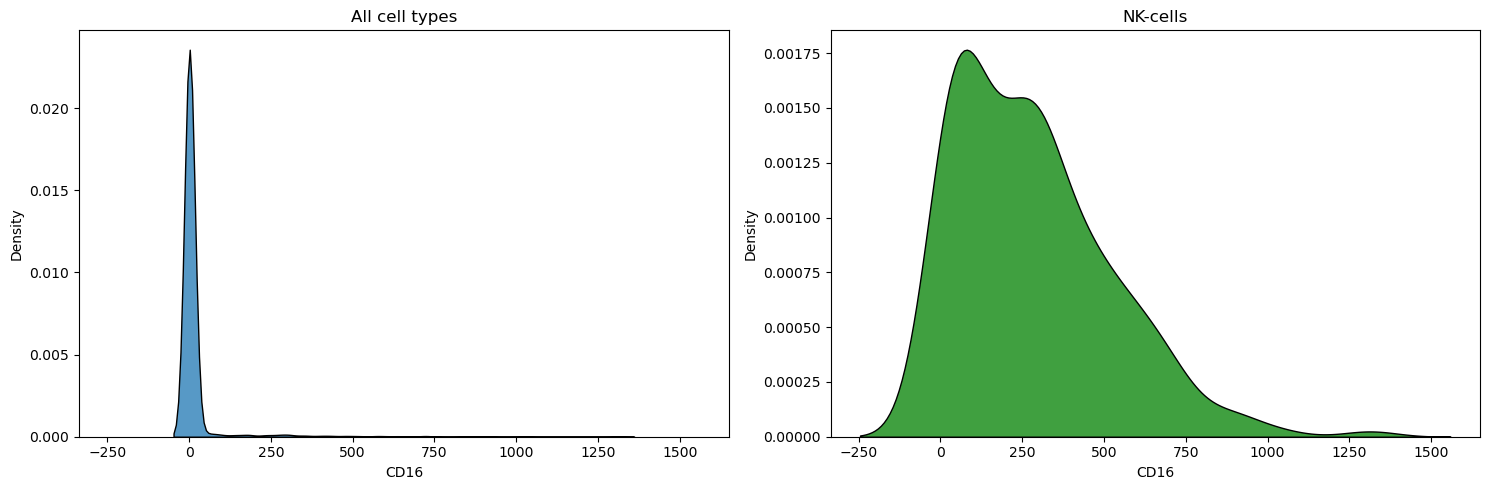

In [35]:
#NK-cells

for column_name in markers:
    fig, ax =plt.subplots(1,2 ,tight_layout=True, figsize=(15, 5), sharex=True)
    fig.show()

    ax1 = sns.kdeplot(data=prot, x=column_name, multiple="stack", ax=ax[0]) ;
    ax2 = sns.kdeplot(data=nk_prot, x=column_name, color = "g", multiple="stack", ax=ax[1]) ;


    ax1.title.set_text('All cell types')    
    ax2.title.set_text('NK-cells')
    
    plt.show()

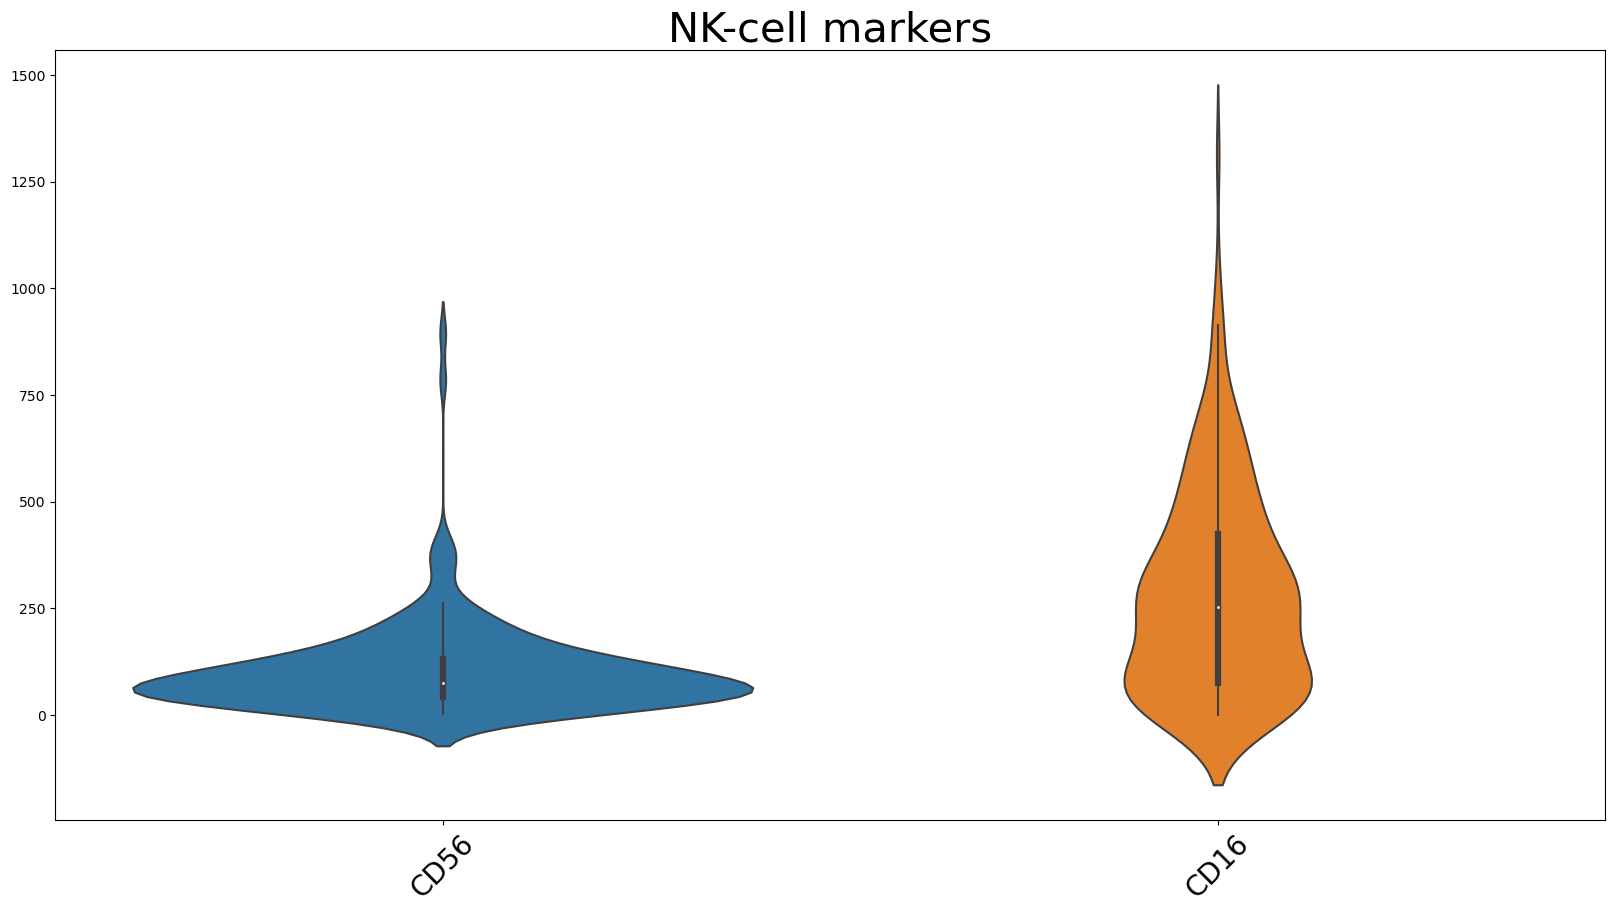

In [36]:
#NK markers

plt.figure(figsize=(20,10))
a=sns.violinplot(data=nk_prot[markers],  fliersize=0)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)
plt.title("NK-cell markers", fontsize=30)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)